## AI Model Creation and Training 

In [19]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#import random
import os
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

#n = int(input("enter number as test"))

directory = "/Users/carlosarotine/Desktop"

os.chdir(directory)



def new_infection(n):
    n = n / 100
    n_new_cases = population * n 
    return n_new_cases




df = pd.read_csv("UAE COVID-19 data.csv")

# Normalizing the data to ensure that training and testing is accurate - min-max scaling 

min_case = df['cases_active'].min()
max_case = df['cases_active'].max()


df['cases_active'] = (df['cases_active'] - min_case) / (max_case - min_case)
mean_case_active = df['cases_active'].mean() 

min_rec = df['cases_recovered'].min()
max_rec = df['cases_recovered'].max()


df['cases_recovered'] = (df['cases_recovered'] - min_rec) / (max_rec - min_rec)
mean_case_rec = df['cases_recovered'].mean()

min_tot = df['cases_total'].min() 
max_tot = df['cases_total'].max()

df['cases_total'] = (df['cases_total'] - min_tot) / (max_tot - min_tot)
mean_case_total = df['cases_total'].mean()


min_dth = df['deaths_total'].min()
max_dth = df['deaths_total'].max()

df['deaths_total'] = (df['deaths_total'] - min_dth) / (max_dth - min_dth)
mean_death_total = df['deaths_total'].mean()

min_tst = df['tests_total'].min()
max_tst = df['tests_total'].max()

df['tests_total'] = (df['tests_total'] - min_tst) / (max_tst - min_tst)
mean_tests_total = df['tests_total'].mean()

min_new = df['cases_new'].min()
max_new = df['cases_new'].max()

df['cases_new'] = (df['cases_new'] - min_new) / (max_new - min_new)
mean_case_new = df['cases_new'].mean()


# Imputing NaN values with averages per variable 
df['tests_total'].fillna(mean_tests_total, inplace = True)

df['cases_active'].fillna(mean_case_active, inplace = True)

df['cases_recovered'].fillna(mean_case_rec, inplace = True)

df['cases_total'].fillna(mean_case_total, inplace = True)

df['deaths_total'].fillna(mean_death_total, inplace = True)

df['cases_new'].fillna(mean_case_new, inplace = True)


# Creating the model

X = df[["cases_active" , "cases_recovered" , "cases_total" , "deaths_total" , "tests_total"]]


y = df["cases_new"]

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2 , train_size = 0.8)


print(X_test.shape)

model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(5,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(1 , activation = 'linear')
])

# Compile the model
custom_learning_rate = 0.0001  # Adjust this value as needed
optimizer = optimizers.Adam(learning_rate=custom_learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error' , metrics = ['mae'])


# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=40, validation_data=(X_test, y_test))



(1510, 5)
Epoch 1/30
151/151 [==============================] - 4s 5ms/step - loss: 0.0127 - mae: 0.0702 - val_loss: 0.0067 - val_mae: 0.0486
Epoch 2/30
151/151 [==============================] - 1s 4ms/step - loss: 0.0071 - mae: 0.0495 - val_loss: 0.0048 - val_mae: 0.0392
Epoch 3/30
151/151 [==============================] - 1s 4ms/step - loss: 0.0064 - mae: 0.0461 - val_loss: 0.0040 - val_mae: 0.0362
Epoch 4/30
151/151 [==============================] - 1s 5ms/step - loss: 0.0059 - mae: 0.0441 - val_loss: 0.0038 - val_mae: 0.0351
Epoch 5/30
151/151 [==============================] - 1s 5ms/step - loss: 0.0055 - mae: 0.0422 - val_loss: 0.0034 - val_mae: 0.0339
Epoch 6/30
151/151 [==============================] - 1s 5ms/step - loss: 0.0052 - mae: 0.0406 - val_loss: 0.0031 - val_mae: 0.0344
Epoch 7/30
151/151 [==============================] - 1s 5ms/step - loss: 0.0047 - mae: 0.0403 - val_loss: 0.0031 - val_mae: 0.0325
Epoch 8/30
151/151 [==============================] - 1s 4ms/step 

In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#import random
import os
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

#n = int(input("enter number as test"))

directory = "/Users/carlosarotine/Desktop"

os.chdir(directory)



def new_infection(n):
    n = n / 100
    n_new_cases = population * n 
    return n_new_cases




df = pd.read_csv("UAE COVID-19 data.csv")

# Normalizing the data to ensure that training and testing is accurate - min-max scaling 

min_case = df['cases_active'].min()
max_case = df['cases_active'].max()


df['cases_active'] = (df['cases_active'] - min_case) / (max_case - min_case)
mean_case_active = df['cases_active'].mean() 

min_rec = df['cases_recovered'].min()
max_rec = df['cases_recovered'].max()


df['cases_recovered'] = (df['cases_recovered'] - min_rec) / (max_rec - min_rec)
mean_case_rec = df['cases_recovered'].mean()

min_tot = df['cases_total'].min() 
max_tot = df['cases_total'].max()

df['cases_total'] = (df['cases_total'] - min_tot) / (max_tot - min_tot)
mean_case_total = df['cases_total'].mean()


min_dth = df['deaths_total'].min()
max_dth = df['deaths_total'].max()

df['deaths_total'] = (df['deaths_total'] - min_dth) / (max_dth - min_dth)
mean_death_total = df['deaths_total'].mean()

min_tst = df['tests_total'].min()
max_tst = df['tests_total'].max()

df['tests_total'] = (df['tests_total'] - min_tst) / (max_tst - min_tst)
mean_tests_total = df['tests_total'].mean()

min_new = df['cases_new'].min()
max_new = df['cases_new'].max()

df['cases_new'] = (df['cases_new'] - min_new) / (max_new - min_new)
mean_case_new = df['cases_new'].mean()


# Imputing NaN values with averages per variable 
df['tests_total'].fillna(mean_tests_total, inplace = True)

df['cases_active'].fillna(mean_case_active, inplace = True)

df['cases_recovered'].fillna(mean_case_rec, inplace = True)

df['cases_total'].fillna(mean_case_total, inplace = True)

df['deaths_total'].fillna(mean_death_total, inplace = True)

df['cases_new'].fillna(mean_case_new, inplace = True)


df_sub = df.sample(2000)

# Creating the model

X = df_sub[["cases_active" , "cases_recovered" , "cases_total" , "deaths_total" , "tests_total"]]


y = df_sub["cases_new"]

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2 , train_size = 0.8)


print(X_test.shape)

model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(5,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(1 , activation = 'linear')
])

# Compile the model
custom_learning_rate = 0.0001  # Adjust this value as needed
optimizer = optimizers.Adam(learning_rate=custom_learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error' , metrics = ['mae'])


# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=40, validation_data=(X_test, y_test))



(400, 5)
Epoch 1/30
40/40 [==============================] - 2s 11ms/step - loss: 0.0205 - mae: 0.0896 - val_loss: 0.0136 - val_mae: 0.0741
Epoch 2/30
40/40 [==============================] - 0s 5ms/step - loss: 0.0134 - mae: 0.0731 - val_loss: 0.0103 - val_mae: 0.0646
Epoch 3/30
40/40 [==============================] - 0s 6ms/step - loss: 0.0120 - mae: 0.0667 - val_loss: 0.0083 - val_mae: 0.0572
Epoch 4/30
40/40 [==============================] - 0s 7ms/step - loss: 0.0103 - mae: 0.0618 - val_loss: 0.0072 - val_mae: 0.0505
Epoch 5/30
40/40 [==============================] - 0s 6ms/step - loss: 0.0094 - mae: 0.0569 - val_loss: 0.0056 - val_mae: 0.0485
Epoch 6/30
40/40 [==============================] - 0s 8ms/step - loss: 0.0079 - mae: 0.0523 - val_loss: 0.0048 - val_mae: 0.0413
Epoch 7/30
40/40 [==============================] - 0s 7ms/step - loss: 0.0071 - mae: 0.0490 - val_loss: 0.0043 - val_mae: 0.0390
Epoch 8/30
40/40 [==============================] - 0s 6ms/step - loss: 0.0073 -

## UAE Specific 

40/40 [==============================] - 0s 2ms/step
[[0.07920436]
 [0.08042074]
 [0.08042074]
 ...
 [0.0244084 ]
 [0.02441706]
 [0.02427411]]


/var/folders/s2/k4nf_72j1m1280jf3c8rgln40000gn/T/ipykernel_56942/847901353.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uae['day'] = pd.to_datetime(uae['day'], format='%d/%m/%Y')


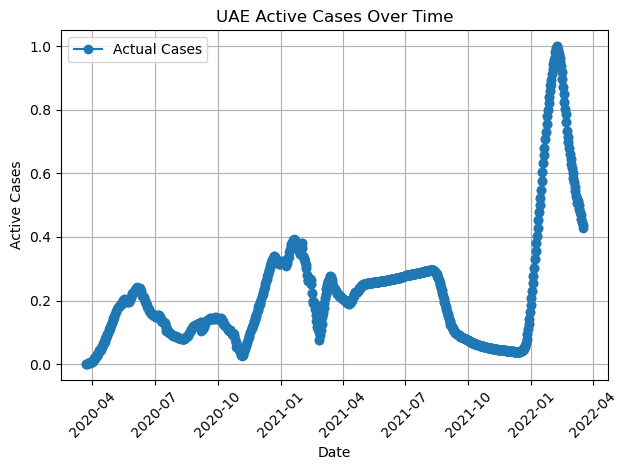

In [20]:
import matplotlib.pyplot as plt

uae = df[df['country'] == 'UAE']

uae_X = uae[["cases_active" , "cases_recovered" , "cases_total" , "deaths_total" , "tests_total"]]

predictions_uae = model.predict(uae_X)

print(predictions_uae)

prediction_list = list(predictions_uae)

uae['day'] = pd.to_datetime(uae['day'], format='%d/%m/%Y')


actual_list = prediction_list[:1000]

#print((predicted_values))

df['day'] = pd.to_datetime(df['day'], format='%d/%m/%Y')

# Sort DataFrame by 'day' column in ascending order
df_sorted = uae.sort_values(by='day')

last_day = df_sorted['day'].iloc[-1]
next_day = last_day + pd.Timedelta(days=1)
list_dates = pd.date_range(start=next_day, periods=len(actual_list), freq='D')  # Use frequency='D' for days

# Plotting
plt.plot(df_sorted['day'], df_sorted['cases_active'], marker='o', label='Actual Cases')
#plt.plot(list_dates, actual_list, marker='o', markersize = 0.7,label='Predicted cases')  # Plot list data with generated dates
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('UAE Active Cases Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

40/40 [==============================] - 0s 2ms/step
[[0.07920436]
 [0.08042074]
 [0.08042074]
 ...
 [0.0244084 ]
 [0.02441706]
 [0.02427411]]


/var/folders/s2/k4nf_72j1m1280jf3c8rgln40000gn/T/ipykernel_56942/3941852338.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uae['day'] = pd.to_datetime(uae['day'], format='%d/%m/%Y')


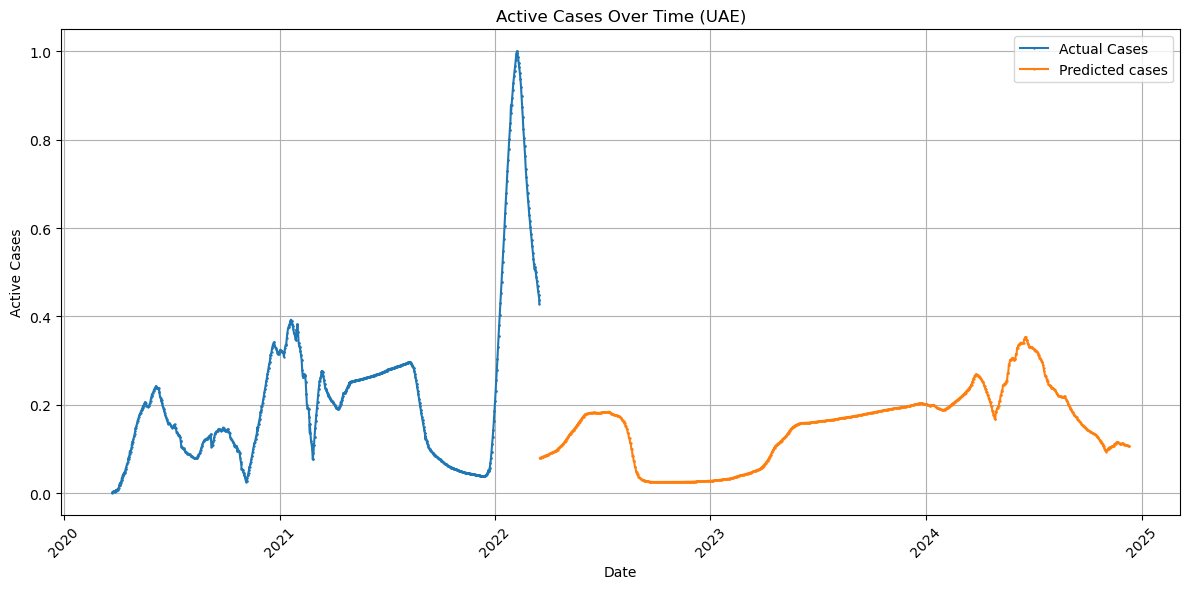

In [62]:
uae = df[df['country'] == 'UAE']

uae_X = uae[["cases_active" , "cases_recovered" , "cases_total" , "deaths_total" , "tests_total"]]


predictions_uae = model.predict(uae_X)

print(predictions_uae)

prediction_list = list(predictions_uae)

actual_list = prediction_list[:1000]

instances = 20

def get_values(predictions_uae):
    ans = []
    for arr in predictions_uae:
        predicted_value = arr[0] 
        prediction = (predicted_value * (max_new - min_new)) + min_new
        ans.append(prediction)
    return ans


predicted_values = get_values(predictions_uae)

uae['day'] = pd.to_datetime(uae['day'], format='%d/%m/%Y')

# Sort DataFrame by 'day' column in ascending order
df_sorted = uae.sort_values(by='day')

last_day = df_sorted['day'].iloc[-1]
next_day = last_day + pd.Timedelta(days=1)
list_dates = pd.date_range(start=next_day, periods=len(actual_list), freq='D')  # Use frequency='D' for days



#last_day_n = df_sorted['day'].iloc[-1]
#next_day_n = last_day + pd.Timedelta(days=1)
#list_dates_n = pd.date_range(start=next_day, periods=len(ans), freq='D') 

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['day'], df_sorted['cases_active'], marker='o',  markersize = 0.7, label='Actual Cases')
plt.plot(list_dates, actual_list, marker='o',  markersize = 0.7, label='Predicted cases')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('Active Cases Over Time (UAE)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()  

40/40 [==============================] - 0s 2ms/step
[[0.07920436]
 [0.08042074]
 [0.08042074]
 ...
 [0.0244084 ]
 [0.02441706]
 [0.02427411]]


/var/folders/s2/k4nf_72j1m1280jf3c8rgln40000gn/T/ipykernel_56942/1633139104.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uae['day'] = pd.to_datetime(uae['day'], format='%d/%m/%Y')


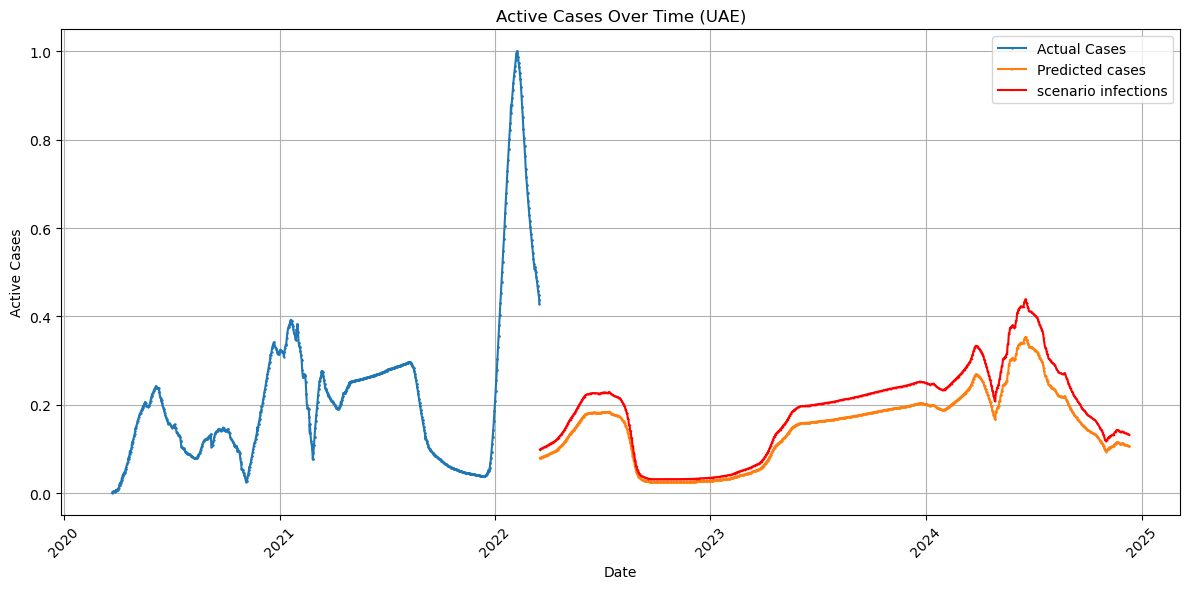

In [65]:
uae = df[df['country'] == 'UAE']

uae_X = uae[["cases_active" , "cases_recovered" , "cases_total" , "deaths_total" , "tests_total"]]


predictions_uae = model.predict(uae_X)

print(predictions_uae)

prediction_list = list(predictions_uae)

actual_list = prediction_list[:1000]

instances = 20

def spec():
    ans = []
    for arr in actual_list:
        x = arr[0]
        y = x / 0.8057
        ans.append(y)
    return ans

ans = spec()

def get_values(predictions_uae):
    ans = []
    for arr in predictions_uae:
        predicted_value = arr[0] 
        prediction = (predicted_value * (max_new - min_new)) + min_new
        ans.append(prediction)
    return ans


predicted_values = get_values(predictions_uae)

uae['day'] = pd.to_datetime(uae['day'], format='%d/%m/%Y')

# Sort DataFrame by 'day' column in ascending order
df_sorted = uae.sort_values(by='day')

last_day = df_sorted['day'].iloc[-1]
next_day = last_day + pd.Timedelta(days=1)
list_dates = pd.date_range(start=next_day, periods=len(actual_list), freq='D')  # Use frequency='D' for days



last_day_n = df_sorted['day'].iloc[-1]
next_day_n = last_day + pd.Timedelta(days=1)
list_dates_n = pd.date_range(start=next_day, periods=len(ans), freq='D') 

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['day'], df_sorted['cases_active'], marker='o',  markersize = 0.7, label='Actual Cases')
plt.plot(list_dates, actual_list, marker='o',  markersize = 0.7, label='Predicted cases')
plt.plot(list_dates_n, ans, marker = 'x', markersize = 0.5, label = 'scenario infections', color = 'red')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('Active Cases Over Time (UAE)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()

40/40 [==============================] - 0s 2ms/step
[[0.07920436]
 [0.08042074]
 [0.08042074]
 ...
 [0.0244084 ]
 [0.02441706]
 [0.02427411]]


/var/folders/s2/k4nf_72j1m1280jf3c8rgln40000gn/T/ipykernel_56942/433425332.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uae['day'] = pd.to_datetime(uae['day'], format='%d/%m/%Y')


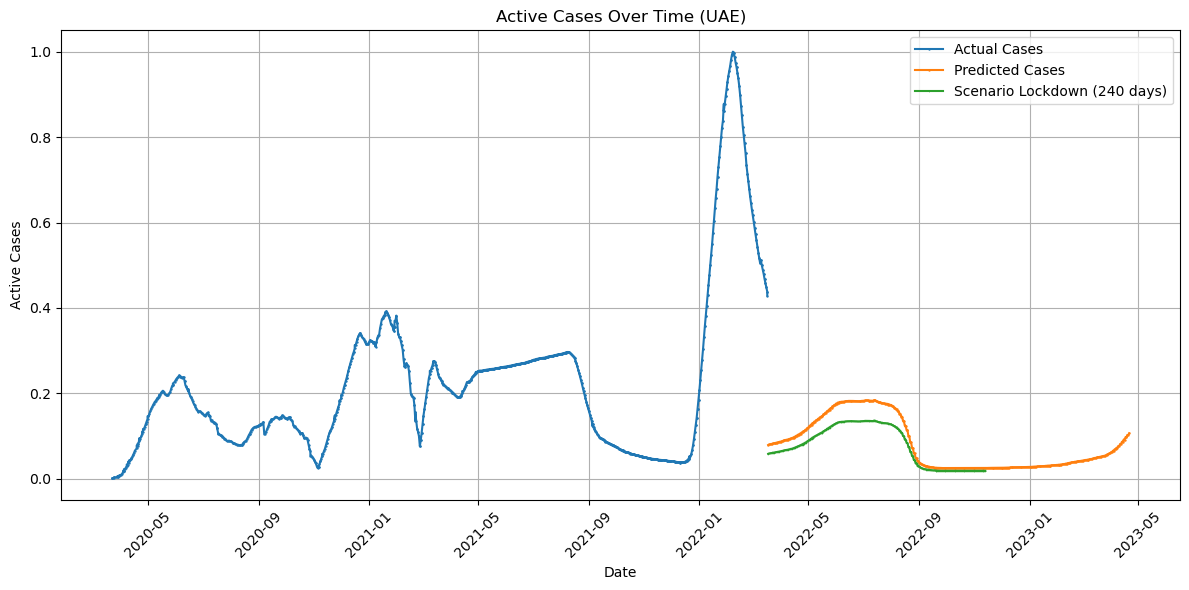

In [75]:
uae = df[df['country'] == 'UAE']

uae_X = uae[["cases_active" , "cases_recovered" , "cases_total" , "deaths_total" , "tests_total"]]


predictions_uae = model.predict(uae_X)

print(predictions_uae)

prediction_list = list(predictions_uae)

actual_list = prediction_list[:400]

instances = 20

def spec():
    ans = []
    for arr in actual_list:
        x = arr[0]
        y = x / 1.352
        ans.append(y)
    return ans

ans = spec()

def get_values(predictions_uae):
    ans = []
    for arr in predictions_uae:
        predicted_value = arr[0] 
        prediction = (predicted_value * (max_new - min_new)) + min_new
        ans.append(prediction)
    return ans


predicted_values = get_values(predictions_uae)

uae['day'] = pd.to_datetime(uae['day'], format='%d/%m/%Y')

# Sort DataFrame by 'day' column in ascending order
df_sorted = uae.sort_values(by='day')

last_day = df_sorted['day'].iloc[-1]
next_day = last_day + pd.Timedelta(days=1)
list_dates = pd.date_range(start=next_day, periods=len(actual_list), freq='D')  # Use frequency='D' for days



short_end_date = next_day_n + pd.Timedelta(days=240)
shortened_dates_n = list_dates_n[list_dates_n <= short_end_date]
shortened_ans = ans[:len(shortened_dates_n)]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['day'], df_sorted['cases_active'], marker='o', markersize=0.7, label='Actual Cases')
plt.plot(list_dates, actual_list, marker='o', markersize=0.7, label='Predicted Cases')
plt.plot(shortened_dates_n, shortened_ans, marker='x', markersize=0.5, label='Scenario Lockdown (240 days)')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('Active Cases Over Time (UAE)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Saudi Specific

/var/folders/s2/k4nf_72j1m1280jf3c8rgln40000gn/T/ipykernel_56942/4201052148.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KSA['day'] = pd.to_datetime(KSA['day'], format='%d/%m/%Y')


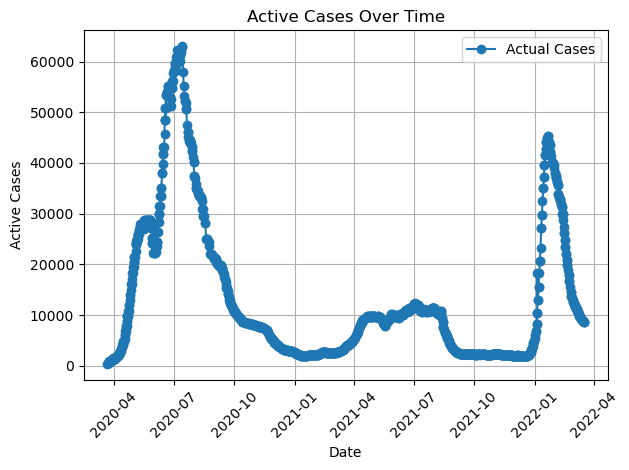

In [23]:
import matplotlib.pyplot as plt

df = pd.read_csv("UAE COVID-19 data.csv")


KSA = df[df['country'] == 'Saudi-Arabia']

KSA_X = KSA[["cases_active" , "cases_recovered" , "cases_total" , "deaths_total" , "tests_total"]]

KSA['day'] = pd.to_datetime(KSA['day'], format='%d/%m/%Y')

df_sorted = KSA.sort_values(by='day')



plt.plot(df_sorted['day'], df_sorted['cases_active'], marker='o', label='Actual Cases')
#plt.plot(list_dates, actual_list, marker='o', label='Predicted cases')  # Plot list data with generated dates
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('Active Cases Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

39/39 [==============================] - 0s 2ms/step
[[0.01500329]
 [0.01593877]
 [0.01593877]
 ...
 [0.02672535]
 [0.0266041 ]
 [0.02631813]]


/var/folders/s2/k4nf_72j1m1280jf3c8rgln40000gn/T/ipykernel_56942/2497398387.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KSA['day'] = pd.to_datetime(KSA['day'], format='%d/%m/%Y')


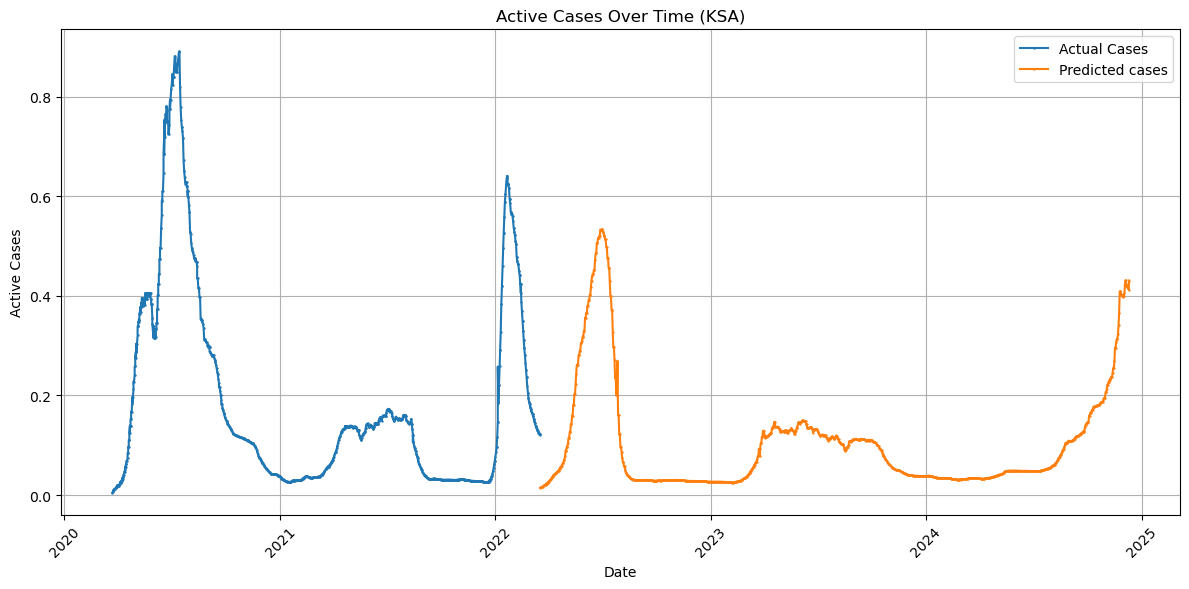

In [60]:
min_case = df['cases_active'].min()
max_case = df['cases_active'].max()


df['cases_active'] = (df['cases_active'] - min_case) / (max_case - min_case)
mean_case_active = df['cases_active'].mean() 

min_rec = df['cases_recovered'].min()
max_rec = df['cases_recovered'].max()


df['cases_recovered'] = (df['cases_recovered'] - min_rec) / (max_rec - min_rec)
mean_case_rec = df['cases_recovered'].mean()

min_tot = df['cases_total'].min() 
max_tot = df['cases_total'].max()

df['cases_total'] = (df['cases_total'] - min_tot) / (max_tot - min_tot)
mean_case_total = df['cases_total'].mean()


min_dth = df['deaths_total'].min()
max_dth = df['deaths_total'].max()

df['deaths_total'] = (df['deaths_total'] - min_dth) / (max_dth - min_dth)
mean_death_total = df['deaths_total'].mean()

min_tst = df['tests_total'].min()
max_tst = df['tests_total'].max()

df['tests_total'] = (df['tests_total'] - min_tst) / (max_tst - min_tst)
mean_tests_total = df['tests_total'].mean()

min_new = df['cases_new'].min()
max_new = df['cases_new'].max()

df['cases_new'] = (df['cases_new'] - min_new) / (max_new - min_new)
mean_case_new = df['cases_new'].mean()


# Imputing NaN values with averages per variable 
df['tests_total'].fillna(mean_tests_total, inplace = True)

df['cases_active'].fillna(mean_case_active, inplace = True)

df['cases_recovered'].fillna(mean_case_rec, inplace = True)

df['cases_total'].fillna(mean_case_total, inplace = True)

df['deaths_total'].fillna(mean_death_total, inplace = True)

df['cases_new'].fillna(mean_case_new, inplace = True)


KSA = df[df['country'] == 'Saudi-Arabia']

KSA_X = KSA[["cases_active" , "cases_recovered" , "cases_total" , "deaths_total" , "tests_total"]]


predictions_KSA = model.predict(KSA_X)

print(predictions_KSA)

prediction_list = list(predictions_KSA)

actual_list = prediction_list[:1000]

instances = 20

def get_values(predictions_KSA):
    ans = []
    for arr in predictions_KSA:
        predicted_value = arr[0] 
        prediction = (predicted_value * (max_new - min_new)) + min_new
        ans.append(prediction)
    return ans


predicted_values = get_values(predictions_KSA)

KSA['day'] = pd.to_datetime(KSA['day'], format='%d/%m/%Y')

# Sort DataFrame by 'day' column in ascending order
df_sorted = KSA.sort_values(by='day')

last_day = df_sorted['day'].iloc[-1]
next_day = last_day + pd.Timedelta(days=1)
list_dates = pd.date_range(start=next_day, periods=len(actual_list), freq='D')  # Use frequency='D' for days



#last_day_n = df_sorted['day'].iloc[-1]
#next_day_n = last_day + pd.Timedelta(days=1)
#list_dates_n = pd.date_range(start=next_day, periods=len(ans), freq='D') 

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['day'], df_sorted['cases_active'], marker='o',  markersize = 0.7, label='Actual Cases')
plt.plot(list_dates, actual_list, marker='o',  markersize = 0.7, label='Predicted cases')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('Active Cases Over Time (KSA)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()  

39/39 [==============================] - 0s 2ms/step
[[0.01500329]
 [0.01593877]
 [0.01593877]
 ...
 [0.02672535]
 [0.0266041 ]
 [0.02631813]]


/var/folders/s2/k4nf_72j1m1280jf3c8rgln40000gn/T/ipykernel_56942/3218918593.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KSA['day'] = pd.to_datetime(KSA['day'], format='%d/%m/%Y')


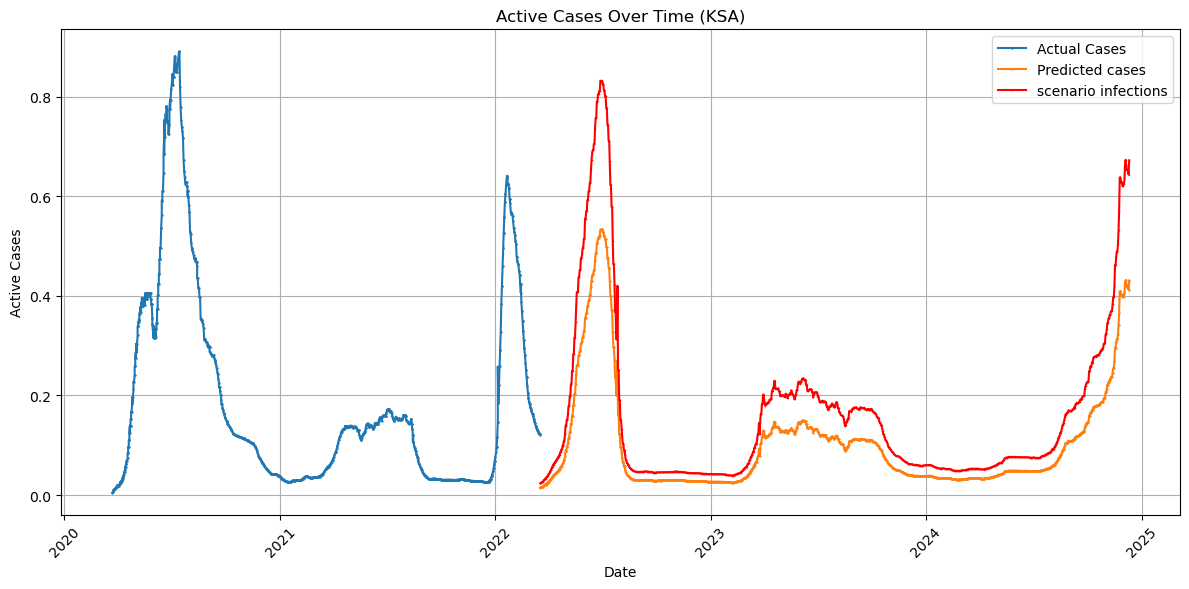

In [64]:
KSA = df[df['country'] == 'Saudi-Arabia']

KSA_X = KSA[["cases_active" , "cases_recovered" , "cases_total" , "deaths_total" , "tests_total"]]


predictions_KSA = model.predict(KSA_X)

print(predictions_KSA)

prediction_list = list(predictions_KSA)

actual_list = prediction_list[:1000]

instances = 20

def spec():
    ans = []
    for arr in actual_list:
        x = arr[0]
        y = x * 1.56
        ans.append(y)
    return ans

ans = spec()

def get_values(predictions_KSA):
    ans = []
    for arr in predictions_KSA:
        predicted_value = arr[0] 
        prediction = (predicted_value * (max_new - min_new)) + min_new
        ans.append(prediction)
    return ans


predicted_values = get_values(predictions_KSA)

KSA['day'] = pd.to_datetime(KSA['day'], format='%d/%m/%Y')

# Sort DataFrame by 'day' column in ascending order
df_sorted = KSA.sort_values(by='day')

last_day = df_sorted['day'].iloc[-1]
next_day = last_day + pd.Timedelta(days=1)
list_dates = pd.date_range(start=next_day, periods=len(actual_list), freq='D')  # Use frequency='D' for days


last_day_n = df_sorted['day'].iloc[-1]
next_day_n = last_day + pd.Timedelta(days=1)
list_dates_n = pd.date_range(start=next_day, periods=len(ans), freq='D') 

#last_day_n = df_sorted['day'].iloc[-1]
#next_day_n = last_day + pd.Timedelta(days=1)
#list_dates_n = pd.date_range(start=next_day, periods=len(ans), freq='D') 

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['day'], df_sorted['cases_active'], marker='o',  markersize = 0.7, label='Actual Cases')
plt.plot(list_dates, actual_list, marker='o',  markersize = 0.7, label='Predicted cases')
plt.plot(list_dates_n, ans, marker = 'x', markersize = 0.5, label = 'scenario infections', color = 'red')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('Active Cases Over Time (KSA)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()  



39/39 [==============================] - 0s 2ms/step
[[0.01500329]
 [0.01593877]
 [0.01593877]
 ...
 [0.02672535]
 [0.0266041 ]
 [0.02631813]]


/var/folders/s2/k4nf_72j1m1280jf3c8rgln40000gn/T/ipykernel_56942/1505735832.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KSA['day'] = pd.to_datetime(KSA['day'], format='%d/%m/%Y')


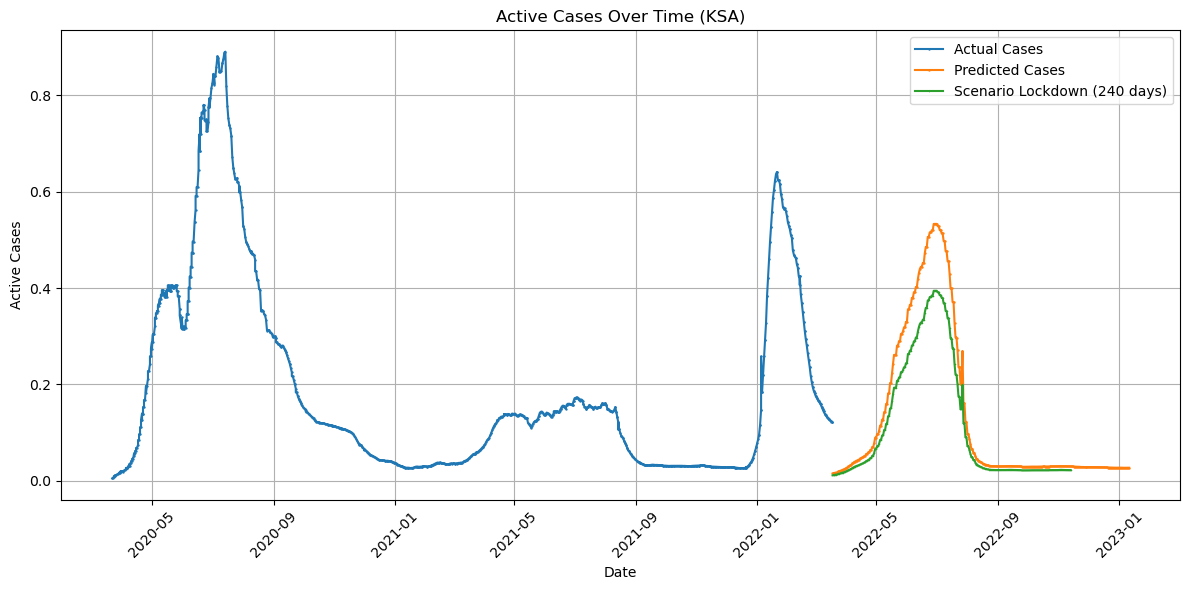

In [73]:
KSA = df[df['country'] == 'Saudi-Arabia']

KSA_X = KSA[["cases_active" , "cases_recovered" , "cases_total" , "deaths_total" , "tests_total"]]


predictions_KSA = model.predict(KSA_X)

print(predictions_KSA)

prediction_list = list(predictions_KSA)

actual_list = prediction_list[:300]

instances = 20

def spec():
    ans = []
    for arr in actual_list:
        x = arr[0]
        y = x /1.352
        ans.append(y)
    return ans

ans = spec()

def get_values(predictions_KSA):
    ans = []
    for arr in predictions_KSA:
        predicted_value = arr[0] 
        prediction = (predicted_value * (max_new - min_new)) + min_new
        ans.append(prediction)
    return ans


predicted_values = get_values(predictions_KSA)

KSA['day'] = pd.to_datetime(KSA['day'], format='%d/%m/%Y')

# Sort DataFrame by 'day' column in ascending order
df_sorted = KSA.sort_values(by='day')

last_day = df_sorted['day'].iloc[-1]
next_day = last_day + pd.Timedelta(days=1)
list_dates = pd.date_range(start=next_day, periods=len(actual_list), freq='D')  # Use frequency='D' for days


short_end_date = next_day_n + pd.Timedelta(days=240)
shortened_dates_n = list_dates_n[list_dates_n <= short_end_date]
shortened_ans = ans[:len(shortened_dates_n)]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['day'], df_sorted['cases_active'], marker='o', markersize=0.7, label='Actual Cases')
plt.plot(list_dates, actual_list, marker='o', markersize=0.7, label='Predicted Cases')
plt.plot(shortened_dates_n, shortened_ans, marker='x', markersize=0.5, label='Scenario Lockdown (240 days)')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('Active Cases Over Time (KSA)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Qatar Specific 

/var/folders/s2/k4nf_72j1m1280jf3c8rgln40000gn/T/ipykernel_56942/3962744366.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Qatar['day'] = pd.to_datetime(Qatar['day'], format='%d/%m/%Y')


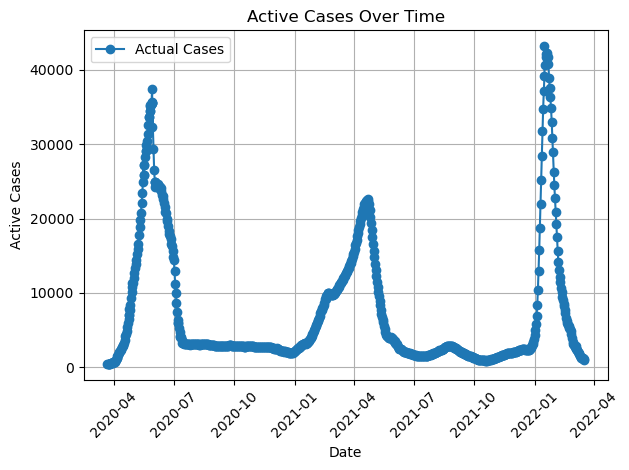

In [25]:
df = pd.read_csv("UAE COVID-19 data.csv")


Qatar = df[df['country'] == 'Qatar']

Qatar_X = Qatar[["cases_active" , "cases_recovered" , "cases_total" , "deaths_total" , "tests_total"]]

Qatar['day'] = pd.to_datetime(Qatar['day'], format='%d/%m/%Y')

df_sorted = Qatar.sort_values(by='day')



plt.plot(df_sorted['day'], df_sorted['cases_active'], marker='o', label='Actual Cases')
#plt.plot(list_dates, actual_list, marker='o', label='Predicted cases')  # Plot list data with generated dates
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('Active Cases Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

24/24 [==============================] - 0s 3ms/step


/var/folders/s2/k4nf_72j1m1280jf3c8rgln40000gn/T/ipykernel_56942/1900019365.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Qatar['day'] = pd.to_datetime(Qatar['day'], format='%d/%m/%Y')


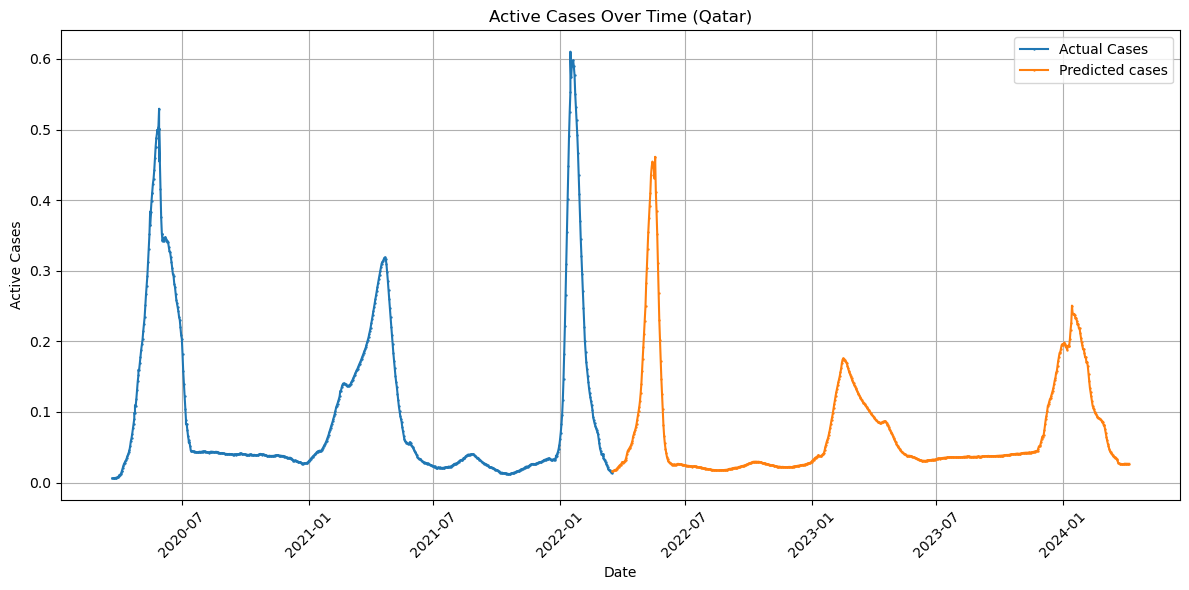

In [58]:
min_case = df['cases_active'].min()
max_case = df['cases_active'].max()


df['cases_active'] = (df['cases_active'] - min_case) / (max_case - min_case)
mean_case_active = df['cases_active'].mean() 

min_rec = df['cases_recovered'].min()
max_rec = df['cases_recovered'].max()


df['cases_recovered'] = (df['cases_recovered'] - min_rec) / (max_rec - min_rec)
mean_case_rec = df['cases_recovered'].mean()

min_tot = df['cases_total'].min() 
max_tot = df['cases_total'].max()

df['cases_total'] = (df['cases_total'] - min_tot) / (max_tot - min_tot)
mean_case_total = df['cases_total'].mean()


min_dth = df['deaths_total'].min()
max_dth = df['deaths_total'].max()

df['deaths_total'] = (df['deaths_total'] - min_dth) / (max_dth - min_dth)
mean_death_total = df['deaths_total'].mean()

min_tst = df['tests_total'].min()
max_tst = df['tests_total'].max()

df['tests_total'] = (df['tests_total'] - min_tst) / (max_tst - min_tst)
mean_tests_total = df['tests_total'].mean()

min_new = df['cases_new'].min()
max_new = df['cases_new'].max()

df['cases_new'] = (df['cases_new'] - min_new) / (max_new - min_new)
mean_case_new = df['cases_new'].mean()


# Imputing NaN values with averages per variable 
df['tests_total'].fillna(mean_tests_total, inplace = True)

df['cases_active'].fillna(mean_case_active, inplace = True)

df['cases_recovered'].fillna(mean_case_rec, inplace = True)

df['cases_total'].fillna(mean_case_total, inplace = True)

df['deaths_total'].fillna(mean_death_total, inplace = True)

df['cases_new'].fillna(mean_case_new, inplace = True)


Qatar = df[df['country'] == 'Qatar']

Qatar_X = Qatar[["cases_active" , "cases_recovered" , "cases_total" , "deaths_total" , "tests_total"]]


predictions_Qatar = model.predict(Qatar_X)

#print(predictions_Qatar)

prediction_list = list(predictions_Qatar)

actual_list = prediction_list[:1000]

instances = 20

def get_values(predictions_Qatar):
    ans = []
    for arr in predictions_Qatar:
        predicted_value = arr[0] 
        prediction = (predicted_value * (max_new - min_new)) + min_new
        ans.append(prediction)
    return ans


predicted_values = get_values(predictions_Qatar)

Qatar['day'] = pd.to_datetime(Qatar['day'], format='%d/%m/%Y')

# Sort DataFrame by 'day' column in ascending order
df_sorted = Qatar.sort_values(by='day')

last_day = df_sorted['day'].iloc[-1]
next_day = last_day + pd.Timedelta(days=1)
list_dates = pd.date_range(start=next_day, periods=len(actual_list), freq='D')  # Use frequency='D' for days



last_day_n = df_sorted['day'].iloc[-1]
next_day_n = last_day + pd.Timedelta(days=1)
list_dates_n = pd.date_range(start=next_day, periods=len(ans), freq='D') 

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['day'], df_sorted['cases_active'], marker='o',  markersize = 0.7, label='Actual Cases')
plt.plot(list_dates, actual_list, marker='o',  markersize = 0.7, label='Predicted cases')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('Active Cases Over Time (Qatar)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()  

24/24 [==============================] - 0s 2ms/step


/var/folders/s2/k4nf_72j1m1280jf3c8rgln40000gn/T/ipykernel_56942/620859827.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Qatar['day'] = pd.to_datetime(Qatar['day'], format='%d/%m/%Y')


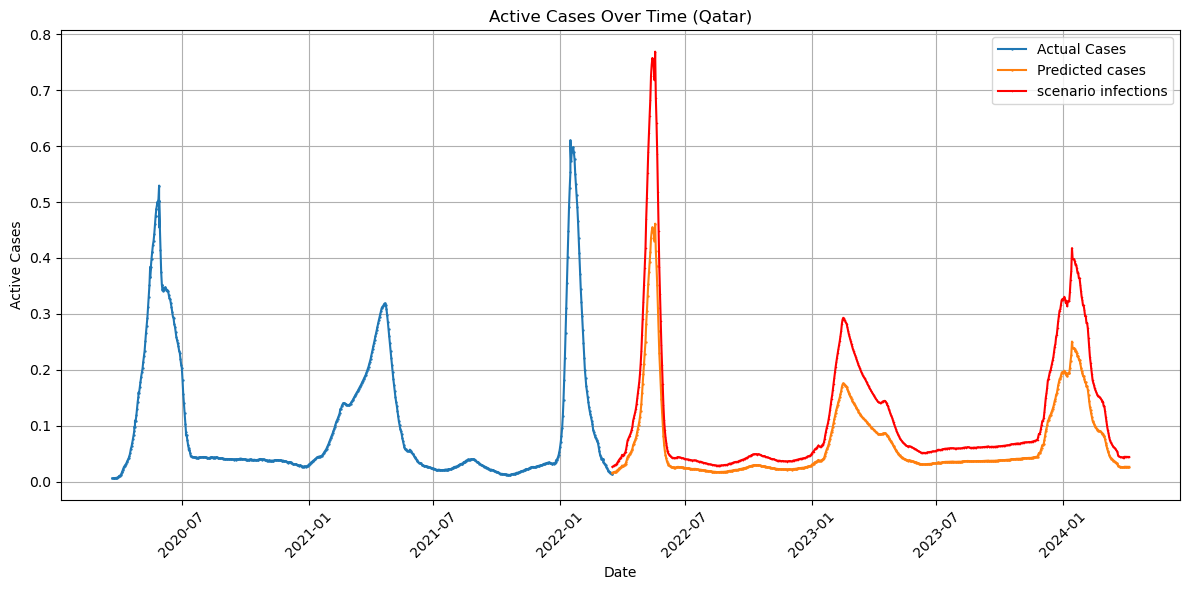

In [63]:
Qatar = df[df['country'] == 'Qatar']

Qatar_X = Qatar[["cases_active" , "cases_recovered" , "cases_total" , "deaths_total" , "tests_total"]]


predictions_Qatar = model.predict(Qatar_X)

#print(predictions_Qatar)

prediction_list = list(predictions_Qatar)

actual_list = prediction_list[:1000]

instances = 20

def spec():
    ans = []
    for arr in actual_list:
        x = arr[0]
        y = x / 0.60
        ans.append(y)
    return ans

ans = spec()

def get_values(predictions_Qatar):
    ans = []
    for arr in predictions_Qatar:
        predicted_value = arr[0] 
        prediction = (predicted_value * (max_new - min_new)) + min_new
        ans.append(prediction)
    return ans


predicted_values = get_values(predictions_Qatar)

Qatar['day'] = pd.to_datetime(Qatar['day'], format='%d/%m/%Y')

# Sort DataFrame by 'day' column in ascending order
df_sorted = Qatar.sort_values(by='day')

last_day = df_sorted['day'].iloc[-1]
next_day = last_day + pd.Timedelta(days=1)
list_dates = pd.date_range(start=next_day, periods=len(actual_list), freq='D')  # Use frequency='D' for days



last_day_n = df_sorted['day'].iloc[-1]
next_day_n = last_day + pd.Timedelta(days=1)
list_dates_n = pd.date_range(start=next_day, periods=len(ans), freq='D') 

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['day'], df_sorted['cases_active'], marker='o',  markersize = 0.7, label='Actual Cases')
plt.plot(list_dates, actual_list, marker='o',  markersize = 0.7, label='Predicted cases')
plt.plot(list_dates_n, ans, marker = 'x', markersize = 0.5, label = 'scenario infections', color = 'red')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('Active Cases Over Time (Qatar)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()  

24/24 [==============================] - 0s 4ms/step


/var/folders/s2/k4nf_72j1m1280jf3c8rgln40000gn/T/ipykernel_56942/1260249964.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Qatar['day'] = pd.to_datetime(Qatar['day'], format='%d/%m/%Y')


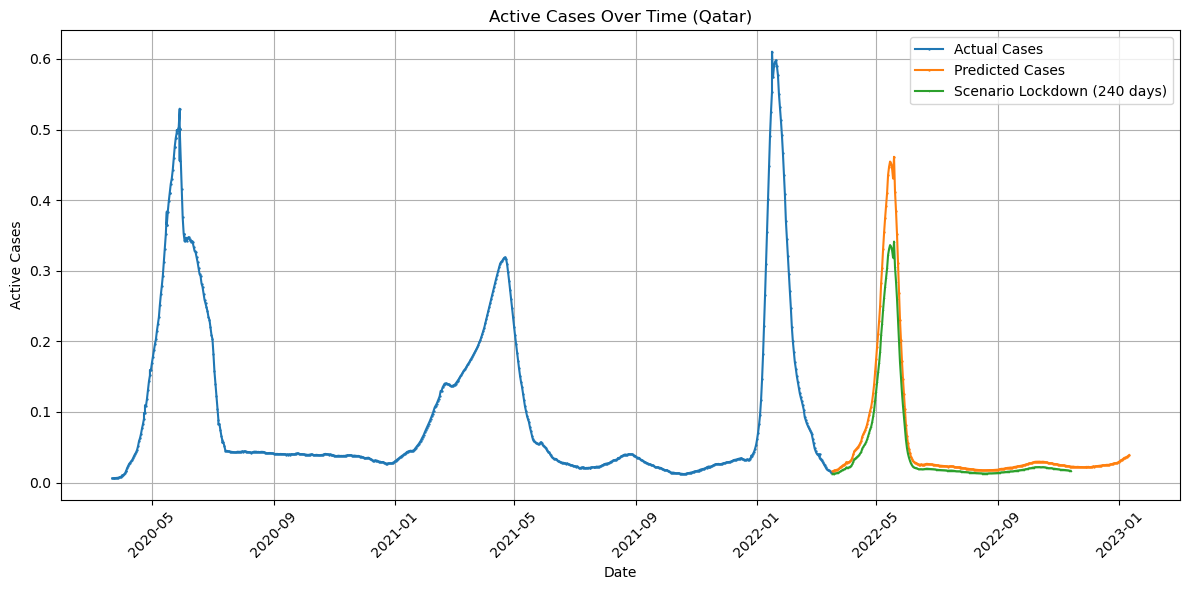

In [70]:
Qatar = df[df['country'] == 'Qatar']

Qatar_X = Qatar[["cases_active" , "cases_recovered" , "cases_total" , "deaths_total" , "tests_total"]]


predictions_Qatar = model.predict(Qatar_X)

#print(predictions_Qatar)

prediction_list = list(predictions_Qatar)

actual_list = prediction_list[:300]

instances = 20

def spec():
    ans = []
    for arr in actual_list:
        x = arr[0]
        y = x / 1.352
        ans.append(y)
    return ans

ans = spec()

def get_values(predictions_Qatar):
    ans = []
    for arr in predictions_Qatar:
        predicted_value = arr[0] 
        prediction = (predicted_value * (max_new - min_new)) + min_new
        ans.append(prediction)
    return ans


predicted_values = get_values(predictions_Qatar)

Qatar['day'] = pd.to_datetime(Qatar['day'], format='%d/%m/%Y')

# Sort DataFrame by 'day' column in ascending order
df_sorted = Qatar.sort_values(by='day')

last_day = df_sorted['day'].iloc[-1]
next_day = last_day + pd.Timedelta(days=1)
list_dates = pd.date_range(start=next_day, periods=len(actual_list), freq='D')  # Use frequency='D' for days



short_end_date = next_day_n + pd.Timedelta(days=240)
shortened_dates_n = list_dates_n[list_dates_n <= short_end_date]
shortened_ans = ans[:len(shortened_dates_n)]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['day'], df_sorted['cases_active'], marker='o', markersize=0.7, label='Actual Cases')
plt.plot(list_dates, actual_list, marker='o', markersize=0.7, label='Predicted Cases')
plt.plot(shortened_dates_n, shortened_ans, marker='x', markersize=0.5, label='Scenario Lockdown (240 days)')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('Active Cases Over Time (Qatar)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Oman Scenario 

/var/folders/s2/k4nf_72j1m1280jf3c8rgln40000gn/T/ipykernel_56942/2480715789.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Oman['day'] = pd.to_datetime(Oman['day'], format='%d/%m/%Y')


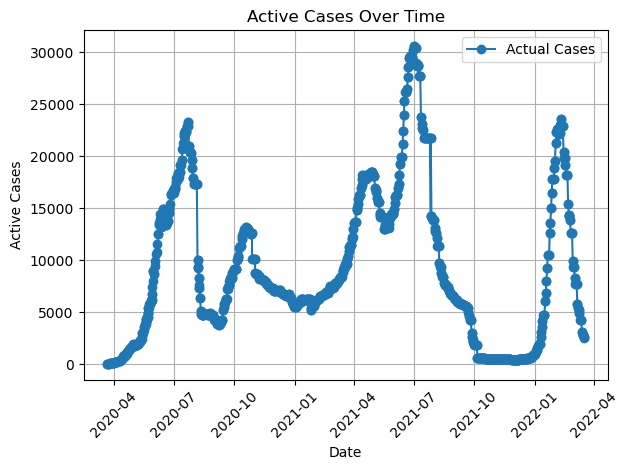

In [28]:
df = pd.read_csv("UAE COVID-19 data.csv")


Oman = df[df['country'] == 'Oman']

Oman_X = Oman[["cases_active" , "cases_recovered" , "cases_total" , "deaths_total" , "tests_total"]]

Oman['day'] = pd.to_datetime(Oman['day'], format='%d/%m/%Y')

df_sorted = Oman.sort_values(by='day')



plt.plot(df_sorted['day'], df_sorted['cases_active'], marker='o', label='Actual Cases')
#plt.plot(list_dates, actual_list, marker='o', label='Predicted cases')  # Plot list data with generated dates
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('Active Cases Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

39/39 [==============================] - 0s 7ms/step


/var/folders/s2/k4nf_72j1m1280jf3c8rgln40000gn/T/ipykernel_56942/2285771825.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Oman['day'] = pd.to_datetime(Oman['day'], format='%d/%m/%Y')


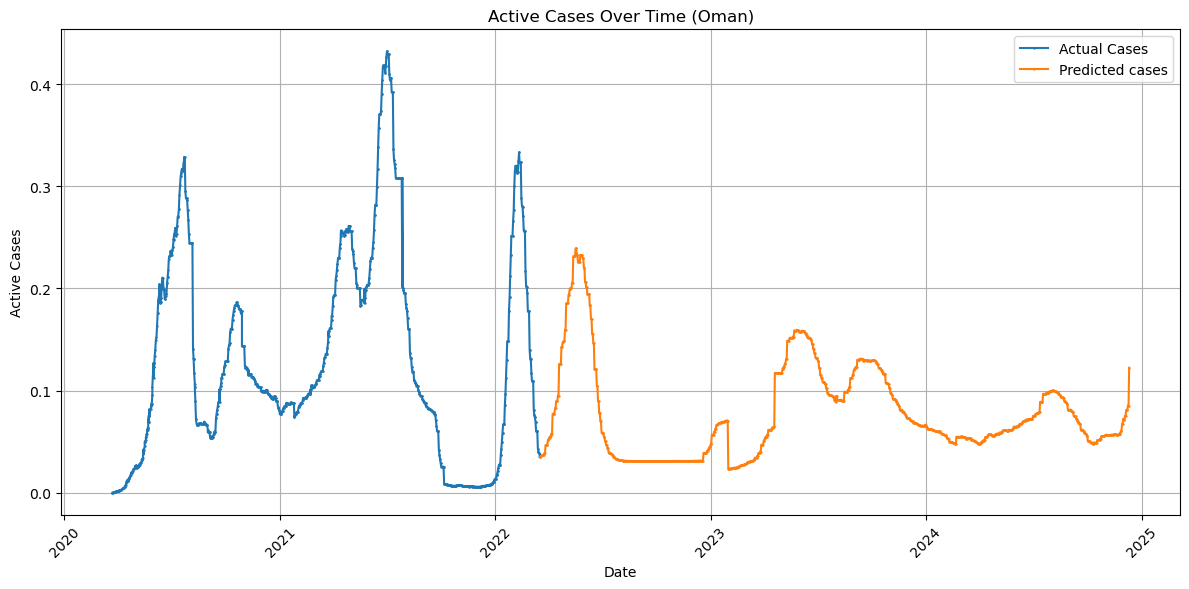

In [90]:
min_case = df['cases_active'].min()
max_case = df['cases_active'].max()


df['cases_active'] = (df['cases_active'] - min_case) / (max_case - min_case)
mean_case_active = df['cases_active'].mean() 

min_rec = df['cases_recovered'].min()
max_rec = df['cases_recovered'].max()


df['cases_recovered'] = (df['cases_recovered'] - min_rec) / (max_rec - min_rec)
mean_case_rec = df['cases_recovered'].mean()

min_tot = df['cases_total'].min() 
max_tot = df['cases_total'].max()

df['cases_total'] = (df['cases_total'] - min_tot) / (max_tot - min_tot)
mean_case_total = df['cases_total'].mean()


min_dth = df['deaths_total'].min()
max_dth = df['deaths_total'].max()

df['deaths_total'] = (df['deaths_total'] - min_dth) / (max_dth - min_dth)
mean_death_total = df['deaths_total'].mean()

min_tst = df['tests_total'].min()
max_tst = df['tests_total'].max()

df['tests_total'] = (df['tests_total'] - min_tst) / (max_tst - min_tst)
mean_tests_total = df['tests_total'].mean()

min_new = df['cases_new'].min()
max_new = df['cases_new'].max()

df['cases_new'] = (df['cases_new'] - min_new) / (max_new - min_new)
mean_case_new = df['cases_new'].mean()


# Imputing NaN values with averages per variable 
df['tests_total'].fillna(mean_tests_total, inplace = True)

df['cases_active'].fillna(mean_case_active, inplace = True)

df['cases_recovered'].fillna(mean_case_rec, inplace = True)

df['cases_total'].fillna(mean_case_total, inplace = True)

df['deaths_total'].fillna(mean_death_total, inplace = True)

df['cases_new'].fillna(mean_case_new, inplace = True)


Oman = df[df['country'] == 'Oman']

Oman_X = Oman[["cases_active" , "cases_recovered" , "cases_total" , "deaths_total" , "tests_total"]]


predictions_Oman = model.predict(Oman_X)

#print(predictions_Qatar)

prediction_list = list(predictions_Oman)

actual_list = prediction_list[:1000]

instances = 20

def get_values(predictions_Oman):
    ans = []
    for arr in predictions_Oman:
        predicted_value = arr[0] 
        prediction = (predicted_value * (max_new - min_new)) + min_new
        ans.append(prediction)
    return ans


predicted_values = get_values(predictions_Oman)

Oman['day'] = pd.to_datetime(Oman['day'], format='%d/%m/%Y')

# Sort DataFrame by 'day' column in ascending order
df_sorted = Oman.sort_values(by='day')

last_day = df_sorted['day'].iloc[-1]
next_day = last_day + pd.Timedelta(days=1)
list_dates = pd.date_range(start=next_day, periods=len(actual_list), freq='D')  # Use frequency='D' for days



last_day_n = df_sorted['day'].iloc[-1]
next_day_n = last_day + pd.Timedelta(days=1)
list_dates_n = pd.date_range(start=next_day, periods=len(ans), freq='D') 

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['day'], df_sorted['cases_active'], marker='o',  markersize = 0.7, label='Actual Cases')
plt.plot(list_dates, actual_list, marker='o',  markersize = 0.7, label='Predicted cases')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('Active Cases Over Time (Oman)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()  

39/39 [==============================] - 0s 2ms/step


/var/folders/s2/k4nf_72j1m1280jf3c8rgln40000gn/T/ipykernel_56942/4074425284.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Oman['day'] = pd.to_datetime(Oman['day'], format='%d/%m/%Y')


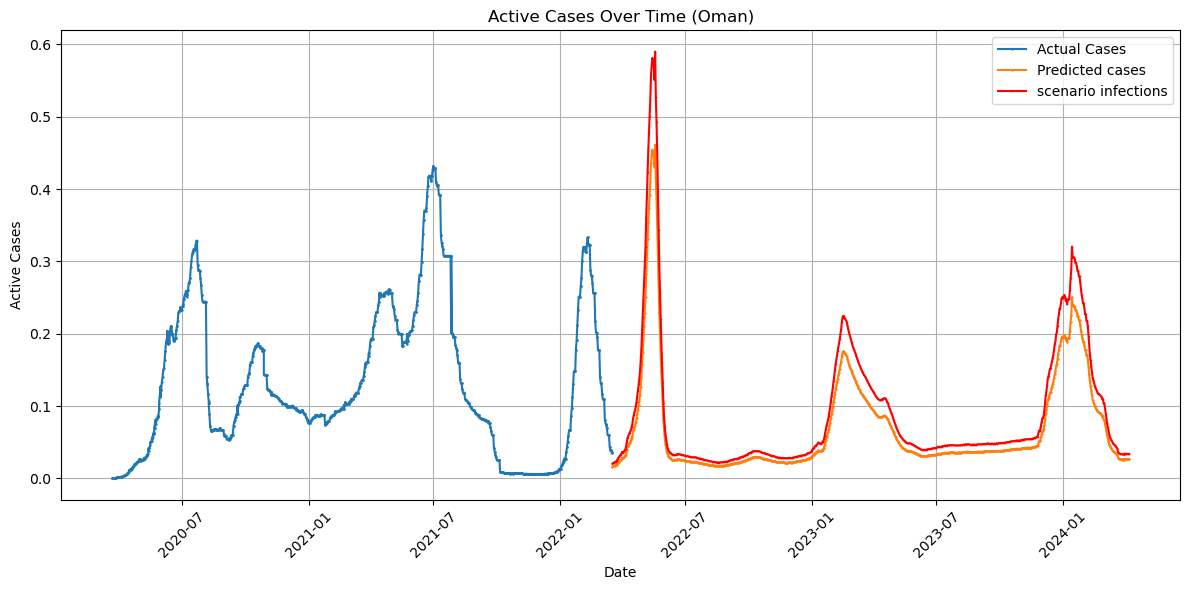

In [91]:
Oman = df[df['country'] == 'Oman']

Oman_X = Oman[["cases_active" , "cases_recovered" , "cases_total" , "deaths_total" , "tests_total"]]


predictions_Oman = model.predict(Oman_X)

#print(predictions_Qatar)

prediction_list = list(predictions_Qatar)

actual_list = prediction_list[:1000]

instances = 20

def spec():
    ans = []
    for arr in actual_list:
        x = arr[0]
        y = x / 0.782
        ans.append(y)
    return ans

ans = spec()

def get_values(predictions_Oman):
    ans = []
    for arr in predictions_Oman:
        predicted_value = arr[0] 
        prediction = (predicted_value * (max_new - min_new)) + min_new
        ans.append(prediction)
    return ans


predicted_values = get_values(predictions_Oman)

Oman['day'] = pd.to_datetime(Oman['day'], format='%d/%m/%Y')

# Sort DataFrame by 'day' column in ascending order
df_sorted = Oman.sort_values(by='day')

last_day = df_sorted['day'].iloc[-1]
next_day = last_day + pd.Timedelta(days=1)
list_dates = pd.date_range(start=next_day, periods=len(actual_list), freq='D')  # Use frequency='D' for days



last_day_n = df_sorted['day'].iloc[-1]
next_day_n = last_day + pd.Timedelta(days=1)
list_dates_n = pd.date_range(start=next_day, periods=len(ans), freq='D') 

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['day'], df_sorted['cases_active'], marker='o',  markersize = 0.7, label='Actual Cases')
plt.plot(list_dates, actual_list, marker='o',  markersize = 0.7, label='Predicted cases')
plt.plot(list_dates_n, ans, marker = 'x', markersize = 0.5, label = 'scenario infections', color = 'red')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('Active Cases Over Time (Oman)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()  

39/39 [==============================] - 0s 2ms/step


/var/folders/s2/k4nf_72j1m1280jf3c8rgln40000gn/T/ipykernel_56942/1480671980.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Oman['day'] = pd.to_datetime(Oman['day'], format='%d/%m/%Y')


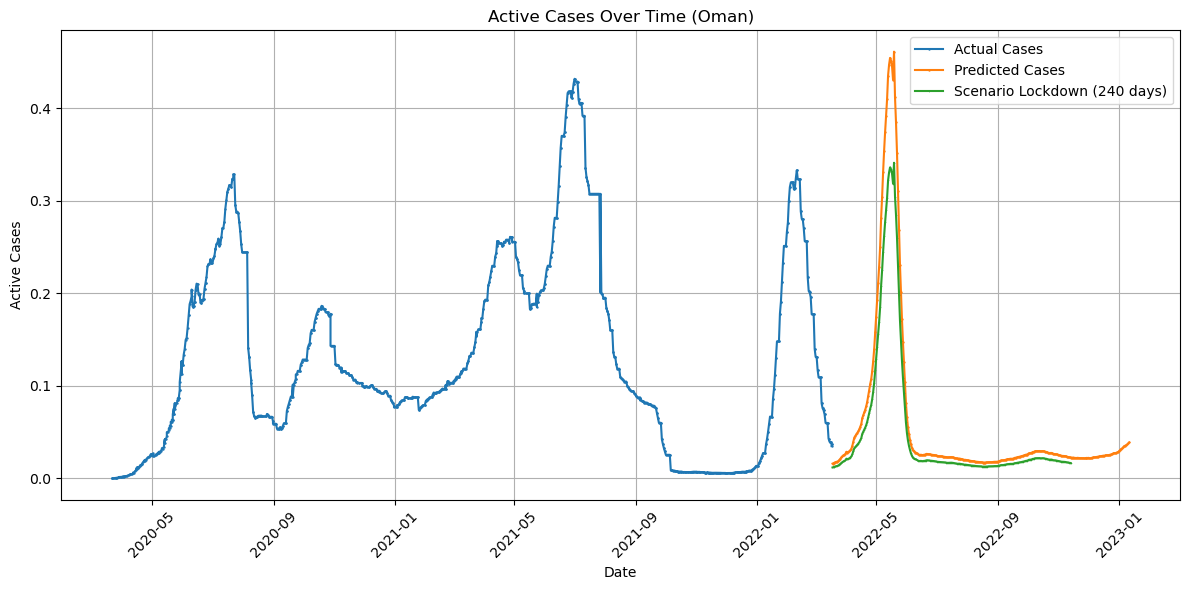

In [92]:
Oman = df[df['country'] == 'Oman']

Oman_X = Oman[["cases_active" , "cases_recovered" , "cases_total" , "deaths_total" , "tests_total"]]


predictions_Oman = model.predict(Oman_X)

#print(predictions_Qatar)

prediction_list = list(predictions_Qatar)

actual_list = prediction_list[:300]

instances = 20

def spec():
    ans = []
    for arr in actual_list:
        x = arr[0]
        y = x / 1.352
        ans.append(y)
    return ans

ans = spec()

def get_values(predictions_Oman):
    ans = []
    for arr in predictions_Oman:
        predicted_value = arr[0] 
        prediction = (predicted_value * (max_new - min_new)) + min_new
        ans.append(prediction)
    return ans


predicted_values = get_values(predictions_Oman)

Oman['day'] = pd.to_datetime(Oman['day'], format='%d/%m/%Y')

# Sort DataFrame by 'day' column in ascending order
df_sorted = Oman.sort_values(by='day')

last_day = df_sorted['day'].iloc[-1]
next_day = last_day + pd.Timedelta(days=1)
list_dates = pd.date_range(start=next_day, periods=len(actual_list), freq='D')  # Use frequency='D' for days



short_end_date = next_day_n + pd.Timedelta(days=240)
shortened_dates_n = list_dates_n[list_dates_n <= short_end_date]
shortened_ans = ans[:len(shortened_dates_n)]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['day'], df_sorted['cases_active'], marker='o', markersize=0.7, label='Actual Cases')
plt.plot(list_dates, actual_list, marker='o', markersize=0.7, label='Predicted Cases')
plt.plot(shortened_dates_n, shortened_ans, marker='x', markersize=0.5, label='Scenario Lockdown (240 days)')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('Active Cases Over Time (Oman)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Kuwait Specific 

/var/folders/s2/k4nf_72j1m1280jf3c8rgln40000gn/T/ipykernel_45706/2039560376.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Kuwait['day'] = pd.to_datetime(Kuwait['day'], format='%d/%m/%Y')


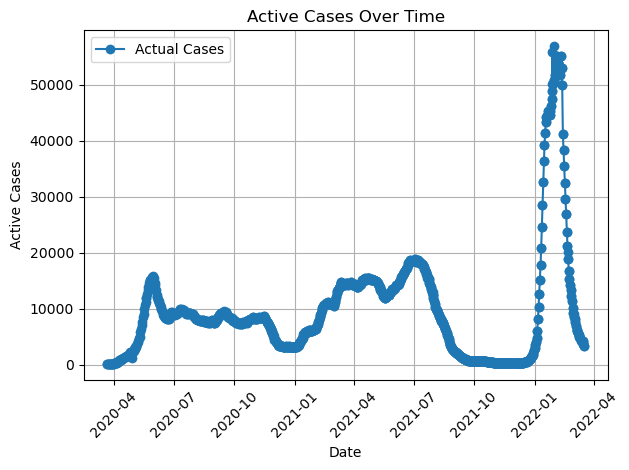

In [40]:
df = pd.read_csv("UAE COVID-19 data.csv")


Kuwait = df[df['country'] == 'Kuwait']

Kuwait_X = Kuwait[["cases_active" , "cases_recovered" , "cases_total" , "deaths_total" , "tests_total"]]

Kuwait['day'] = pd.to_datetime(Kuwait['day'], format='%d/%m/%Y')

df_sorted = Kuwait.sort_values(by='day')



plt.plot(df_sorted['day'], df_sorted['cases_active'], marker='o', label='Actual Cases')
#plt.plot(list_dates, actual_list, marker='o', label='Predicted cases')  # Plot list data with generated dates
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('Active Cases Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

43/43 [==============================] - 0s 2ms/step


/var/folders/s2/k4nf_72j1m1280jf3c8rgln40000gn/T/ipykernel_56942/1740069821.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Kuwait['day'] = pd.to_datetime(Kuwait['day'], format='%d/%m/%Y')


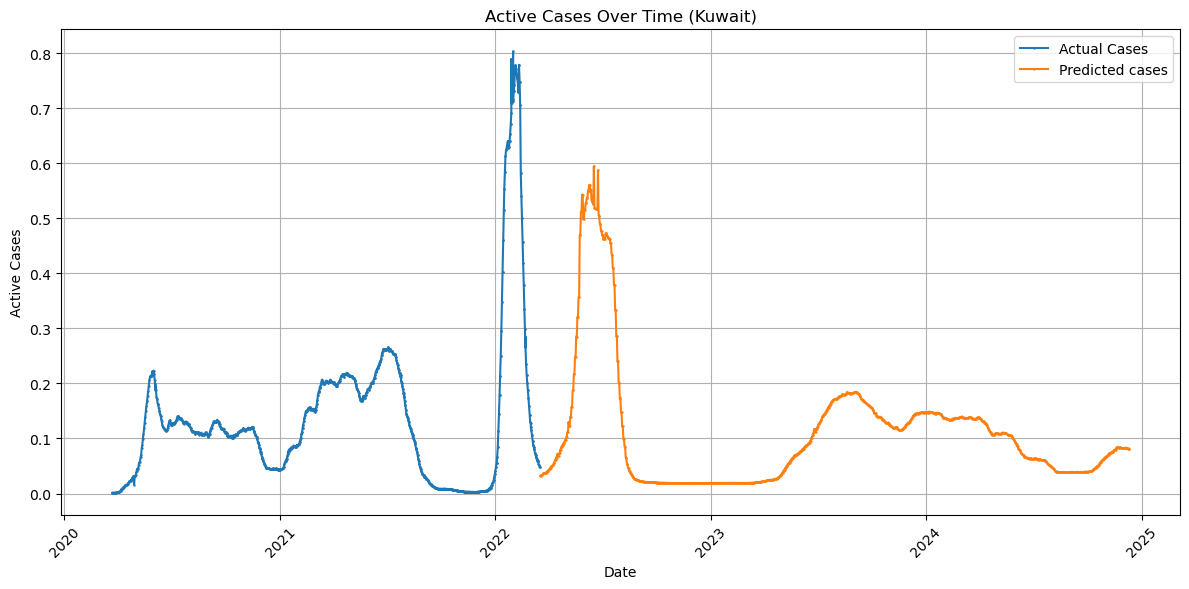

In [54]:
min_case = df['cases_active'].min()
max_case = df['cases_active'].max()


df['cases_active'] = (df['cases_active'] - min_case) / (max_case - min_case)
mean_case_active = df['cases_active'].mean() 

min_rec = df['cases_recovered'].min()
max_rec = df['cases_recovered'].max()


df['cases_recovered'] = (df['cases_recovered'] - min_rec) / (max_rec - min_rec)
mean_case_rec = df['cases_recovered'].mean()

min_tot = df['cases_total'].min() 
max_tot = df['cases_total'].max()

df['cases_total'] = (df['cases_total'] - min_tot) / (max_tot - min_tot)
mean_case_total = df['cases_total'].mean()


min_dth = df['deaths_total'].min()
max_dth = df['deaths_total'].max()

df['deaths_total'] = (df['deaths_total'] - min_dth) / (max_dth - min_dth)
mean_death_total = df['deaths_total'].mean()

min_tst = df['tests_total'].min()
max_tst = df['tests_total'].max()

df['tests_total'] = (df['tests_total'] - min_tst) / (max_tst - min_tst)
mean_tests_total = df['tests_total'].mean()

min_new = df['cases_new'].min()
max_new = df['cases_new'].max()

df['cases_new'] = (df['cases_new'] - min_new) / (max_new - min_new)
mean_case_new = df['cases_new'].mean()


# Imputing NaN values with averages per variable 
df['tests_total'].fillna(mean_tests_total, inplace = True)

df['cases_active'].fillna(mean_case_active, inplace = True)

df['cases_recovered'].fillna(mean_case_rec, inplace = True)

df['cases_total'].fillna(mean_case_total, inplace = True)

df['deaths_total'].fillna(mean_death_total, inplace = True)

df['cases_new'].fillna(mean_case_new, inplace = True)


Kuwait = df[df['country'] == 'Kuwait']

Kuwait_X = Kuwait[["cases_active" , "cases_recovered" , "cases_total" , "deaths_total" , "tests_total"]]


predictions_Kuwait = model.predict(Kuwait_X)

#print(predictions_Qatar)

prediction_list = list(predictions_Kuwait)

actual_list = prediction_list[:1000]

instances = 20

def get_values(predictions_Kuwait):
    ans = []
    for arr in predictions_Kuwait:
        predicted_value = arr[0] 
        prediction = (predicted_value * (max_new - min_new)) + min_new
        ans.append(prediction)
    return ans


predicted_values = get_values(predictions_Kuwait)

Kuwait['day'] = pd.to_datetime(Kuwait['day'], format='%d/%m/%Y')

# Sort DataFrame by 'day' column in ascending order
df_sorted = Kuwait.sort_values(by='day')

last_day = df_sorted['day'].iloc[-1]
next_day = last_day + pd.Timedelta(days=1)
list_dates = pd.date_range(start=next_day, periods=len(actual_list), freq='D')  # Use frequency='D' for days



last_day_n = df_sorted['day'].iloc[-1]
next_day_n = last_day + pd.Timedelta(days=1)
list_dates_n = pd.date_range(start=next_day, periods=len(ans), freq='D') 

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['day'], df_sorted['cases_active'], marker='o',  markersize = 0.7, label='Actual Cases')
plt.plot(list_dates, actual_list, marker='o',  markersize = 0.7, label='Predicted cases')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('Active Cases Over Time (Kuwait)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()  

43/43 [==============================] - 0s 2ms/step


/var/folders/s2/k4nf_72j1m1280jf3c8rgln40000gn/T/ipykernel_56942/3345909011.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Kuwait['day'] = pd.to_datetime(Kuwait['day'], format='%d/%m/%Y')


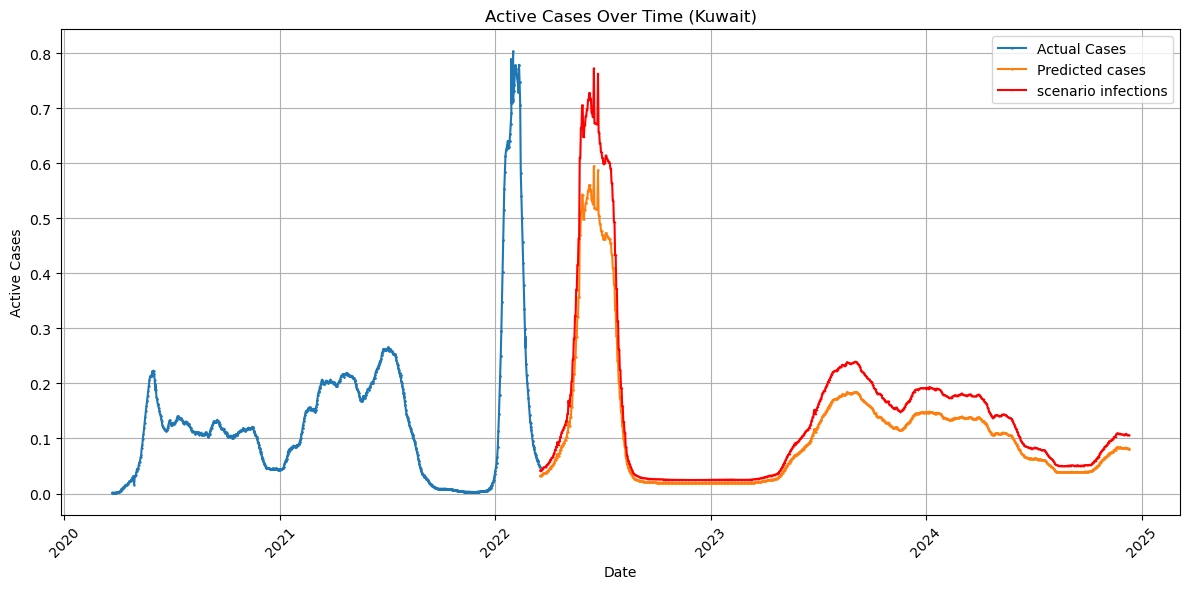

In [53]:
Kuwait = df[df['country'] == 'Kuwait']

Kuwait_X = Kuwait[["cases_active" , "cases_recovered" , "cases_total" , "deaths_total" , "tests_total"]]


predictions_Kuwait = model.predict(Kuwait_X)


prediction_list = list(predictions_Kuwait)

actual_list = prediction_list[:1000]

instances = 20

def spec():
    ans = []
    for arr in actual_list:
        x = arr[0]
        y = x / 0.77
        ans.append(y)
    return ans

ans = spec()

def get_values(predictions_Kuwait):
    ans = []
    for arr in predictions_Kuwait:
        predicted_value = arr[0] 
        prediction = (predicted_value * (max_new - min_new)) + min_new
        ans.append(prediction)
    return ans


predicted_values = get_values(predictions_Kuwait)

Kuwait['day'] = pd.to_datetime(Kuwait['day'], format='%d/%m/%Y')

# Sort DataFrame by 'day' column in ascending order
df_sorted = Kuwait.sort_values(by='day')

last_day = df_sorted['day'].iloc[-1]
next_day = last_day + pd.Timedelta(days=1)
list_dates = pd.date_range(start=next_day, periods=len(actual_list), freq='D')  # Use frequency='D' for days



last_day_n = df_sorted['day'].iloc[-1]
next_day_n = last_day + pd.Timedelta(days=1)
list_dates_n = pd.date_range(start=next_day, periods=len(ans), freq='D') 

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['day'], df_sorted['cases_active'], marker='o',  markersize = 0.7, label='Actual Cases')
plt.plot(list_dates, actual_list, marker='o',  markersize = 0.7, label='Predicted cases')
plt.plot(list_dates_n, ans, marker = 'x', markersize = 0.5, label = 'scenario infections' , color = 'red')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('Active Cases Over Time (Kuwait)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()  

43/43 [==============================] - 0s 3ms/step


/var/folders/s2/k4nf_72j1m1280jf3c8rgln40000gn/T/ipykernel_56942/521062896.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Kuwait['day'] = pd.to_datetime(Kuwait['day'], format='%d/%m/%Y')


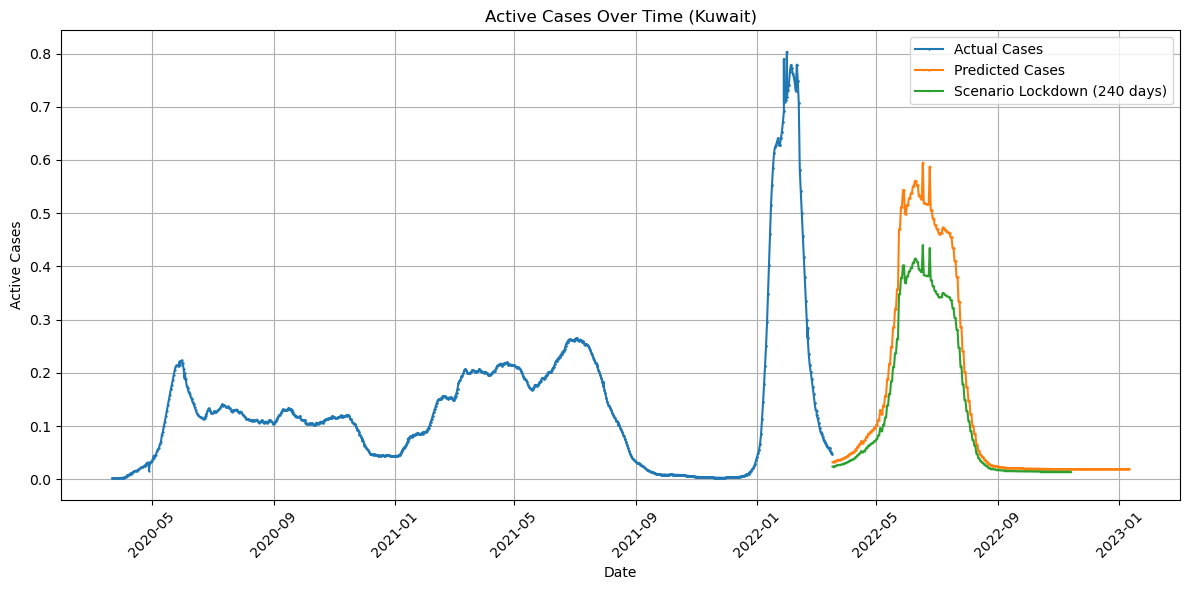

In [67]:
Kuwait = df[df['country'] == 'Kuwait']

Kuwait_X = Kuwait[["cases_active" , "cases_recovered" , "cases_total" , "deaths_total" , "tests_total"]]


predictions_Kuwait = model.predict(Kuwait_X)


prediction_list = list(predictions_Kuwait)

actual_list = prediction_list[:300]

instances = 20

def spec():
    ans = []
    for arr in actual_list:
        x = arr[0]
        y = x / 1.352
        ans.append(y)
    return ans

ans = spec()

def get_values(predictions_Kuwait):
    ans = []
    for arr in predictions_Kuwait:
        predicted_value = arr[0] 
        prediction = (predicted_value * (max_new - min_new)) + min_new
        ans.append(prediction)
    return ans


predicted_values = get_values(predictions_Kuwait)

Kuwait['day'] = pd.to_datetime(Kuwait['day'], format='%d/%m/%Y')

# Sort DataFrame by 'day' column in ascending order
df_sorted = Kuwait.sort_values(by='day')

last_day = df_sorted['day'].iloc[-1]
next_day = last_day + pd.Timedelta(days=1)
list_dates = pd.date_range(start=next_day, periods=len(actual_list), freq='D')  # Use frequency='D' for days

short_end_date = next_day_n + pd.Timedelta(days=240)
shortened_dates_n = list_dates_n[list_dates_n <= short_end_date]
shortened_ans = ans[:len(shortened_dates_n)]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['day'], df_sorted['cases_active'], marker='o', markersize=0.7, label='Actual Cases')
plt.plot(list_dates, actual_list, marker='o', markersize=0.7, label='Predicted Cases')
plt.plot(shortened_dates_n, shortened_ans, marker='x', markersize=0.5, label='Scenario Lockdown (240 days)')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('Active Cases Over Time (Kuwait)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()  

## Bahrain Specific

/var/folders/s2/k4nf_72j1m1280jf3c8rgln40000gn/T/ipykernel_45706/3047452901.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bahrain['day'] = pd.to_datetime(Bahrain['day'], format='%d/%m/%Y')


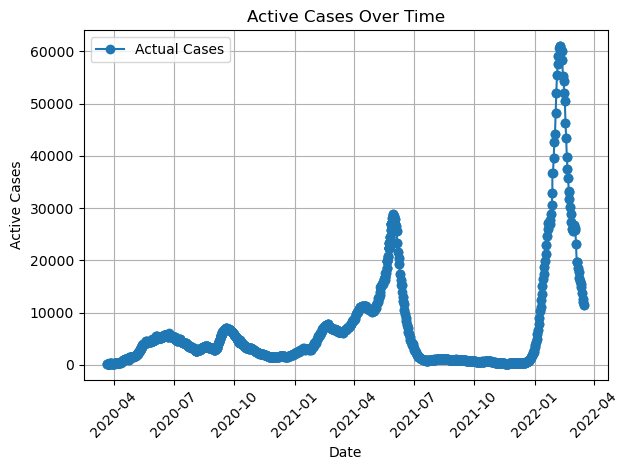

In [45]:
df = pd.read_csv("UAE COVID-19 data.csv")


Bahrain = df[df['country'] == 'Bahrain']

Bahrain_X = Bahrain[["cases_active" , "cases_recovered" , "cases_total" , "deaths_total" , "tests_total"]]

Bahrain['day'] = pd.to_datetime(Bahrain['day'], format='%d/%m/%Y')

df_sorted = Bahrain.sort_values(by='day')



plt.plot(df_sorted['day'], df_sorted['cases_active'], marker='o', label='Actual Cases')
#plt.plot(list_dates, actual_list, marker='o', label='Predicted cases')  # Plot list data with generated dates
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('Active Cases Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

55/55 [==============================] - 0s 2ms/step


/var/folders/s2/k4nf_72j1m1280jf3c8rgln40000gn/T/ipykernel_56942/2685178903.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bahrain['day'] = pd.to_datetime(Bahrain['day'], format='%d/%m/%Y')


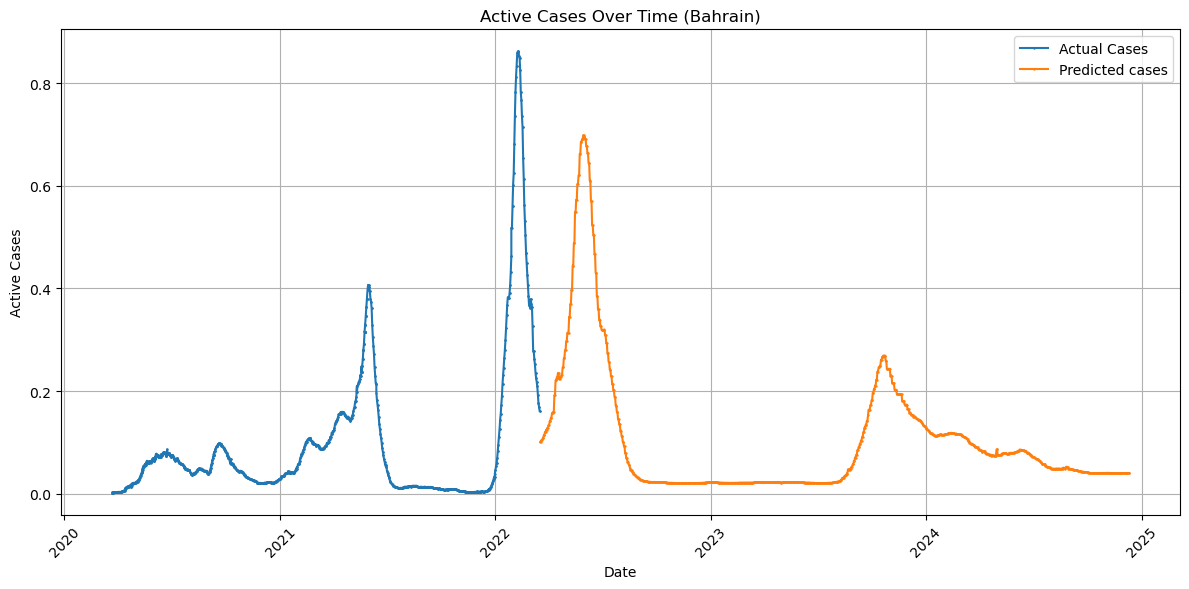

In [52]:
min_case = df['cases_active'].min()
max_case = df['cases_active'].max()


df['cases_active'] = (df['cases_active'] - min_case) / (max_case - min_case)
mean_case_active = df['cases_active'].mean() 

min_rec = df['cases_recovered'].min()
max_rec = df['cases_recovered'].max()


df['cases_recovered'] = (df['cases_recovered'] - min_rec) / (max_rec - min_rec)
mean_case_rec = df['cases_recovered'].mean()

min_tot = df['cases_total'].min() 
max_tot = df['cases_total'].max()

df['cases_total'] = (df['cases_total'] - min_tot) / (max_tot - min_tot)
mean_case_total = df['cases_total'].mean()


min_dth = df['deaths_total'].min()
max_dth = df['deaths_total'].max()

df['deaths_total'] = (df['deaths_total'] - min_dth) / (max_dth - min_dth)
mean_death_total = df['deaths_total'].mean()

min_tst = df['tests_total'].min()
max_tst = df['tests_total'].max()

df['tests_total'] = (df['tests_total'] - min_tst) / (max_tst - min_tst)
mean_tests_total = df['tests_total'].mean()

min_new = df['cases_new'].min()
max_new = df['cases_new'].max()

df['cases_new'] = (df['cases_new'] - min_new) / (max_new - min_new)
mean_case_new = df['cases_new'].mean()


# Imputing NaN values with averages per variable 
df['tests_total'].fillna(mean_tests_total, inplace = True)

df['cases_active'].fillna(mean_case_active, inplace = True)

df['cases_recovered'].fillna(mean_case_rec, inplace = True)

df['cases_total'].fillna(mean_case_total, inplace = True)

df['deaths_total'].fillna(mean_death_total, inplace = True)

df['cases_new'].fillna(mean_case_new, inplace = True)


Bahrain = df[df['country'] == 'Bahrain']

Bahrain_X = Bahrain[["cases_active" , "cases_recovered" , "cases_total" , "deaths_total" , "tests_total"]]


predictions_Bahrain = model.predict(Bahrain_X)

#print(predictions_Qatar)

prediction_list = list(predictions_Bahrain)

actual_list = prediction_list[:1000]

instances = 20

def get_values(predictions_Bahrain):
    ans = []
    for arr in predictions_Bahrain:
        predicted_value = arr[0] 
        prediction = (predicted_value * (max_new - min_new)) + min_new
        ans.append(prediction)
    return ans


predicted_values = get_values(predictions_Bahrain)

Bahrain['day'] = pd.to_datetime(Bahrain['day'], format='%d/%m/%Y')

# Sort DataFrame by 'day' column in ascending order
df_sorted = Bahrain.sort_values(by='day')

last_day = df_sorted['day'].iloc[-1]
next_day = last_day + pd.Timedelta(days=1)
list_dates = pd.date_range(start=next_day, periods=len(actual_list), freq='D')  # Use frequency='D' for days



last_day_n = df_sorted['day'].iloc[-1]
next_day_n = last_day + pd.Timedelta(days=1)
list_dates_n = pd.date_range(start=next_day, periods=len(ans), freq='D') 

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['day'], df_sorted['cases_active'], marker='o',  markersize = 0.7, label='Actual Cases')
plt.plot(list_dates, actual_list, marker='o',  markersize = 0.7, label='Predicted cases')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('Active Cases Over Time (Bahrain)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()  

43/43 [==============================] - 0s 2ms/step


/var/folders/s2/k4nf_72j1m1280jf3c8rgln40000gn/T/ipykernel_56942/3453827471.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bahrain['day'] = pd.to_datetime(Bahrain['day'], format='%d/%m/%Y')


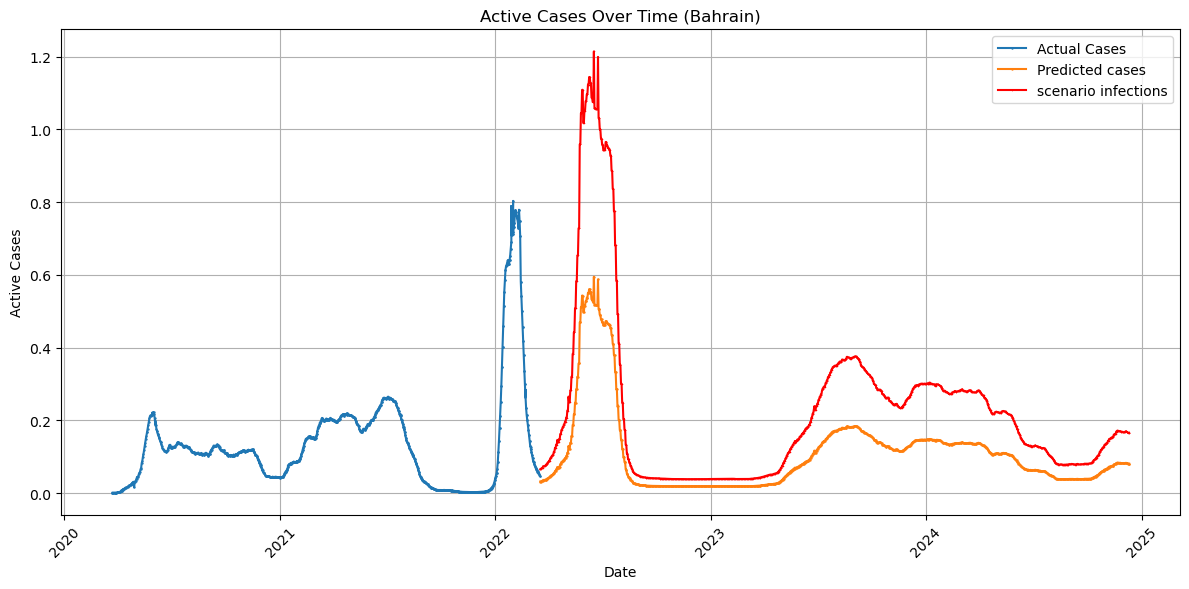

In [66]:
Bahrain = df[df['country'] == 'Kuwait']

Bahrain_X = Bahrain[["cases_active" , "cases_recovered" , "cases_total" , "deaths_total" , "tests_total"]]


predictions_Bahrain = model.predict(Bahrain_X)


prediction_list = list(predictions_Bahrain)

actual_list = prediction_list[:1000]

instances = 20

def spec():
    ans = []
    for arr in actual_list:
        x = arr[0]
        y = x / 0.49
        ans.append(y)
    return ans

ans = spec()

def get_values(predictions_Bahrain):
    ans = []
    for arr in predictions_Bahrain:
        predicted_value = arr[0] 
        prediction = (predicted_value * (max_new - min_new)) + min_new
        ans.append(prediction)
    return ans


predicted_values = get_values(predictions_Bahrain)

Bahrain['day'] = pd.to_datetime(Bahrain['day'], format='%d/%m/%Y')

# Sort DataFrame by 'day' column in ascending order
df_sorted = Bahrain.sort_values(by='day')

last_day = df_sorted['day'].iloc[-1]
next_day = last_day + pd.Timedelta(days=1)
list_dates = pd.date_range(start=next_day, periods=len(actual_list), freq='D')  # Use frequency='D' for days



last_day_n = df_sorted['day'].iloc[-1]
next_day_n = last_day + pd.Timedelta(days=1)
list_dates_n = pd.date_range(start=next_day, periods=len(ans), freq='D') 

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['day'], df_sorted['cases_active'], marker='o',  markersize = 0.7, label='Actual Cases')
plt.plot(list_dates, actual_list, marker='o',  markersize = 0.7, label='Predicted cases')
plt.plot(list_dates_n, ans, marker = 'x', markersize = 0.5, label = 'scenario infections', color = 'red')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('Active Cases Over Time (Bahrain)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()

43/43 [==============================] - 0s 2ms/step


/var/folders/s2/k4nf_72j1m1280jf3c8rgln40000gn/T/ipykernel_56942/4202012521.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bahrain['day'] = pd.to_datetime(Bahrain['day'], format='%d/%m/%Y')


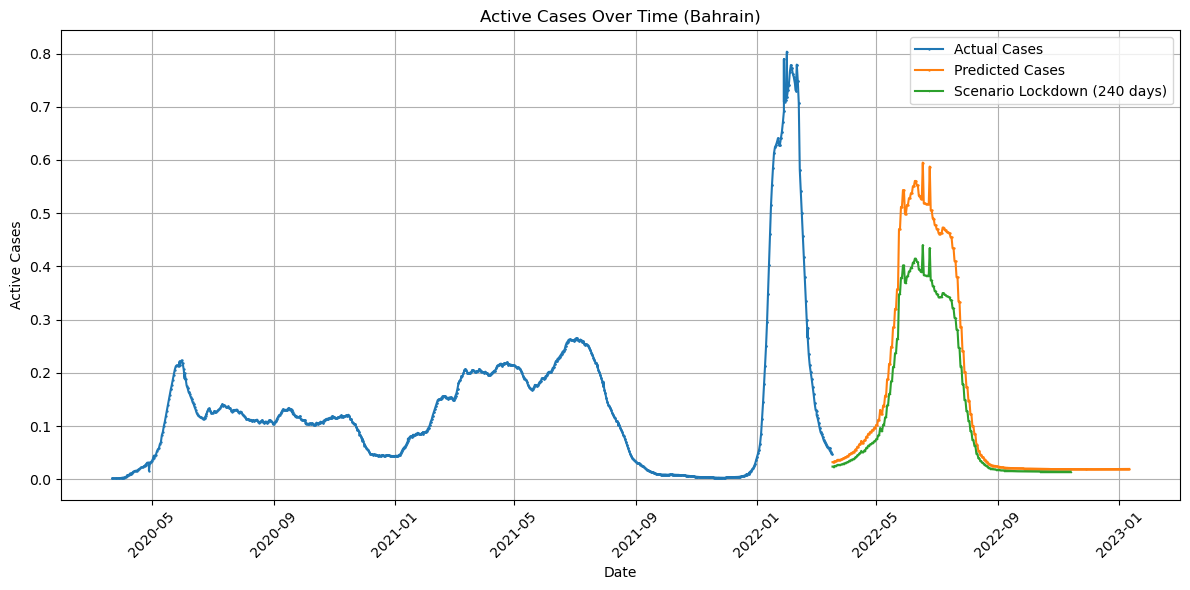

In [39]:
Bahrain = df[df['country'] == 'Kuwait']

Bahrain_X = Bahrain[["cases_active", "cases_recovered", "cases_total", "deaths_total", "tests_total"]]

predictions_Bahrain = model.predict(Bahrain_X)

prediction_list = list(predictions_Bahrain)
actual_list = prediction_list[:300]

instances = 20

def spec():
    ans = []
    for arr in actual_list:
        x = arr[0]
        y = x / 1.352
        ans.append(y)
    return ans

ans = spec()

def get_values(predictions_Bahrain):
    ans = []
    for arr in predictions_Bahrain:
        predicted_value = arr[0]
        prediction = (predicted_value * (max_new - min_new)) + min_new
        ans.append(prediction)
    return ans

predicted_values = get_values(predictions_Bahrain)

Bahrain['day'] = pd.to_datetime(Bahrain['day'], format='%d/%m/%Y')

# Sort DataFrame by 'day' column in ascending order
df_sorted = Bahrain.sort_values(by='day')

last_day = df_sorted['day'].iloc[-1]
next_day = last_day + pd.Timedelta(days=1)
list_dates = pd.date_range(start=next_day, periods=len(actual_list), freq='D')

next_day_n = last_day + pd.Timedelta(days=1)
list_dates_n = pd.date_range(start=next_day, periods=len(ans), freq='D')

# Define the end date for the shortened plot 
short_end_date = next_day_n + pd.Timedelta(days=240)
shortened_dates_n = list_dates_n[list_dates_n <= short_end_date]
shortened_ans = ans[:len(shortened_dates_n)]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['day'], df_sorted['cases_active'], marker='o', markersize=0.7, label='Actual Cases')
plt.plot(list_dates, actual_list, marker='o', markersize=0.7, label='Predicted Cases')
plt.plot(shortened_dates_n, shortened_ans, marker='x', markersize=0.5, label='Scenario Lockdown (240 days)')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('Active Cases Over Time (Bahrain)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

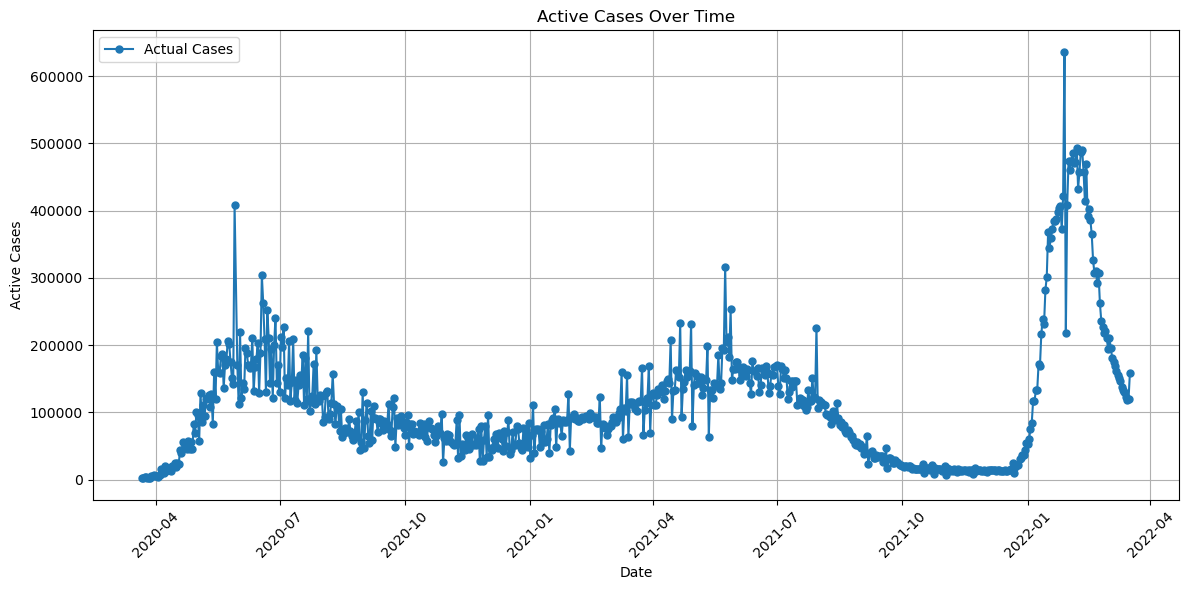

In [87]:
df = pd.read_csv("UAE COVID-19 data.csv")

df['day'] = pd.to_datetime(df['day'], format='%d/%m/%Y')

# Group by 'day' and sum the 'cases_active' for each date
df_grouped = df.groupby('day')['cases_active'].sum().reset_index()

# Plot the aggregated data
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['day'], df_grouped['cases_active'], marker='o', markersize=5, label='Actual Cases')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('Active Cases Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()